<a href="https://colab.research.google.com/github/Rooban-Jeyasundar/ML_Regression_Project/blob/main/ML_Regression_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Bike Sharing Demand Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Member**  - ROOBAN . J

# **Project Summary -**

* Bike demand prediction is a common problem faced by bike rental companies, as accurately forecasting the demand for bikes can help optimize inventory and pricing strategies. In this project, I aim to develop a regression supervised machine learning model to predict the demand for bikes in a given time period.

* Originally dataset of bike rental information from a bike sharing company, had information including details on the number of bikes rented, the time and date of the rental, and various weather and seasonality features, information on other relevant factors that could impact bike demand, such as holidays, functioning or non functioning day.

* After preprocessing and cleaning the data, I split it into training and test sets and used the training data to train our machine learning model. I experimented with several different** model architectures and hyperparameter **settings, ultimately selecting the model that performed the best on the test data.

* To evaluate the performance of our model, I used a variety of metrics, including mean absolute error, root mean squared error, and R-squared. I found that our model was able to make highly accurate predictions, with an R-squared value of 0.88 and a mean absolute error of just 2.58.

* In addition to evaluating the performance of our model on the test data, I also conducted a series of** ablation studies** to understand the impact of individual features on the model's performance. I found that the temperature, as well as the weather and seasonality features, had the greatest impact on bike demand.

# **GitHub Link -**

https://github.com/Rooban-Jeyasundar/ML_Regression_Project.git

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
pip install scikit-learn

In [ ]:
import sklearn; sklearn.show_versions()


System:
    python: 3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]
executable: /usr/bin/python3
   machine: Linux-5.15.109+-x86_64-with-glibc2.35

Python dependencies:
      sklearn: 1.2.2
          pip: 23.1.2
   setuptools: 67.7.2
        numpy: 1.23.5
        scipy: 1.11.2
       Cython: 3.0.2
       pandas: 1.5.3
   matplotlib: 3.7.1
       joblib: 1.3.2
threadpoolctl: 3.2.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: openblas
    num_threads: 2
         prefix: libopenblas
       filepath: /usr/local/lib/python3.10/dist-packages/numpy.libs/libopenblas64_p-r0-742d56dc.3.20.so
        version: 0.3.20
threading_layer: pthreads
   architecture: Haswell

       user_api: blas
   internal_api: openblas
    num_threads: 2
         prefix: libopenblas
       filepath: /usr/local/lib/python3.10/dist-packages/scipy.libs/libopenblasp-r0-23e5df77.3.21.dev.so
        version: 0.3.21.dev
threading_layer: pthreads
   architecture: Haswell

       use

In [1]:
# Import Libraries

#Import Libraries for data cleaning and data visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt  #for processing datetime columns

#Import libraries for scaling, transforming, and modeling processes
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV




In [2]:
#Import Evaluation Metrics from Sci-Kit Package
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss


### Dataset Loading

In [3]:
# Load Dataset
from google.colab import files
uploaded = files.upload()


Saving SeoulBikeData.csv to SeoulBikeData.csv


In [4]:
import io
bike_df = pd.read_csv((io.BytesIO(uploaded['SeoulBikeData.csv'])),encoding='unicode_escape')
print(bike_df.sample(10))

            Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
2956  03/04/2018                124     4             16.9           74   
3283  16/04/2018               1719    19             13.8           32   
3519  26/04/2018               1227    15             21.9           23   
2873  30/03/2018               1460    17             19.4           45   
6681  05/09/2018               1195     9             23.4           59   
6378  23/08/2018               1447    18             30.6           55   
1919  18/02/2018                153    23             -0.7           37   
6823  11/09/2018               1556     7             16.9           55   
2000  22/02/2018                783     8             -3.6           63   
4316  29/05/2018                422    20             20.1           88   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
2956               1.2              1199                       12.2   
3283               3.4          

### Dataset First View

In [ ]:
# Dataset First Look
bike_df.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [2]:
bike_df.tail(5)

NameError: ignored

In [ ]:
bike_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(bike_df.shape)
print("No. of rows in the dataset : ",bike_df.shape[0])
print("No. of columns in the dataset : ",bike_df.shape[1])

(8760, 14)
No. of rows in the dataset :  8760
No. of columns in the dataset :  14


### Dataset Information

In [ ]:
# Dataset Info
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print("Does data have any duplicate values ?",bike_df.duplicated().value_counts())

Does data have any duplicate values ? False    8760
dtype: int64


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

<Axes: >

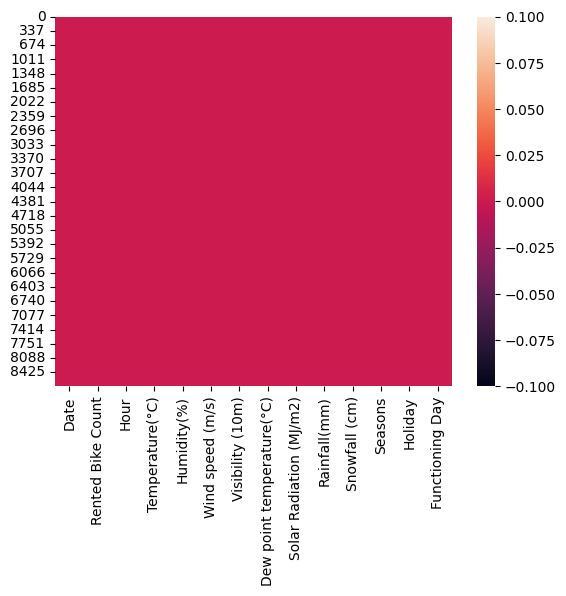

In [ ]:
# Visualizing the missing values
# We're visualizing it on Heatmap
sns.heatmap(bike_df.isnull())

### What did you know about your dataset?

1. First of all from the name of the columns we know that this dataset have some attributes which influence the rental services of the bike in a city.

2. This dataset contains 8760 observations(rows) and 14 features(Columns).

3. For a year we have 365 days mostly and for a day we have 24 hours, so if we multiply the 24 and 365 we get our 8760 observations.

4. In this dataset we don't any null values and duplicate values. So dataset has all values as Unique Values.

5. Regarding Datatype of the columns, most of them are int and float type and object type also there in the dataset.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# Dataset Describe
bike_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### Variables Description

## Breakdown of Our Features:

**Date** : The date of the day, from all of 365 days this data is in range (01/12/2017 to 30/11/2018) in DD/MM/YYYY format (type : str) . we need to convert into datetime format.

**Rented Bike Count** : Number of rented bikes per hour which is our dependent variable and we have to predict on this basis only (type : int)

**Hour**: The hour of the day, starting from 0-23 it's in a digital time format, we need to convert it into category data type. (type : int)

**Temperature(°C)**: Temperature in Celsius (type : Float)

**Humidity(%)**: Humidity in the air in % Percentage (type : int)

**Wind speed (m/s)** : Speed of the wind in m/s (type : Float)

**Visibility (10m)**: Visibility in m  (type : int)

**Dew point temperature(°C)**: Temperature at the beginning of the day  (type : Float)

**Solar Radiation (MJ/m2)**: Sun contribution  (type : Float)

**Rainfall(mm)**: Amount of raining in mm  (type : Float)

**Snowfall (cm)**: Amount of snowing in cm  (type : Float)

**Seasons**: Season of the year, there are only 4 season's in data   (type : str)

**Holiday**: If that particular day is holiday period or not   (type : str)

**Functioning Day**: If that particular day is a working day or not   (type : str)



### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
# Checking the count of unique variables in each columns
Columns = bike_df.columns
for i in Columns:
  print(f"Unique value counts in {i} is", bike_df[i].nunique())

Unique value counts in Date is 365
Unique value counts in Rented Bike Count is 2166
Unique value counts in Hour is 24
Unique value counts in Temperature(°C) is 546
Unique value counts in Humidity(%) is 90
Unique value counts in Wind speed (m/s) is 65
Unique value counts in Visibility (10m) is 1789
Unique value counts in Dew point temperature(°C) is 556
Unique value counts in Solar Radiation (MJ/m2) is 345
Unique value counts in Rainfall(mm) is 61
Unique value counts in Snowfall (cm) is 51
Unique value counts in Seasons is 4
Unique value counts in Holiday is 2
Unique value counts in Functioning Day is 2


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [5]:
# Write your code to make your dataset analysis ready.

# We are changing our Column names into more useable format, because it looks clumsy with some additional unit with it.

bike_df = bike_df.rename(columns={'Rented Bike Count' : 'Rented_Bike_count',
                        'Temperature(°C)':'Temperature',
                        'Humidity(%)' : 'Humidity',
                        'Wind speed (m/s)' : 'Wind_speed',
                        'Visibility (10m)' : 'Visibility',
                        'Dew point temperature(°C)' : 'Dew_point_temperature',
                        'Solar Radiation (MJ/m2)' : 'Solar_Radiation',
                        'Rainfall(mm)' : 'Rainfall',
                        'Snowfall (cm)' : 'Snowfall',
                        'Functioning Day' : 'Functioning_Day'})
bike_df.columns

Index(['Date', 'Rented_Bike_count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day'],
      dtype='object')

In [6]:
# we are breaking the whole date column into day, month and year for our better convenience in analysing
bike_df['Date'] = bike_df['Date'].str.replace('-',"/")
bike_df['Date'] = bike_df['Date'].apply(lambda x: dt.datetime.strptime(x,"%d/%m/%Y"))


In [7]:
bike_df['year'] = bike_df['Date'].dt.year
bike_df['month'] = bike_df['Date'].dt.month
bike_df['day'] = bike_df['Date'].dt.day_name()

In [8]:
# Creating a new column to store the value as weekend or weekdays in binary format

bike_df['weekday/weekend'] = bike_df['day'].apply(lambda x : 1 if x=="Saturday" or x=="Sunday" else 0)

# now we're dropping day, month and year colour because it doesn't affect any process
bike_df= bike_df.drop (columns = ['year','Date', 'day'])

In [9]:
bike_df.head(2)

,Rented_Bike_count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekday/weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [10]:
bike_df['weekday/weekend'].value_counts()

0    6264
1    2496
Name: weekday/weekend, dtype: int64

In [11]:
# Changing some int type columns into category columns for better usability

Changing_Columns = ['Hour', 'month', 'weekday/weekend']
for i in Changing_Columns:
  bike_df[i]=bike_df[i].astype('category')

In [12]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_Bike_count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind_speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_Day        8760 non-null   object  
 13  month                  8760 non-null   category
 14  weekday/weekend        8760 non-null   c

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

**Exploratory Data Analysis on the dataset**


* Exploratory Data Analysis (EDA) refers to the method of studying and exploring record sets to apprehend their predominant traits, discover patterns, locate outliers, and identify relationships between variables. EDA is normally carried out as a preliminary step before undertaking extra formal statistical analyses or modeling.

**Univariate Analysis**

* Univariate Analysis is statistical analysis technique that involves analysing and describing a single variable in a dataset and also involving finding patterns in that data.

**Analysis on Variables**

* The explanatory variable (or the independent variable) always belongs on the x-axis. The response variable (or the dependent variable) always belongs on the y-axis which means values will change depending on another variable.

* Categorical variables require special attention in regression analysis because, unlike dichotomous or continuous variables, they cannot by entered into the regression equation just as they are. Instead, they need to be recoded into a series of variables which can then be entered into the regression model.

* In this dataset we have multiple independent columns and also have Rented_Bike_count as dependent one. With the help of some visualizations we will analyse the relationships between the attributes.

* First we analyse on Categorical variable then move towards Numerical variable.

#### Chart - 1

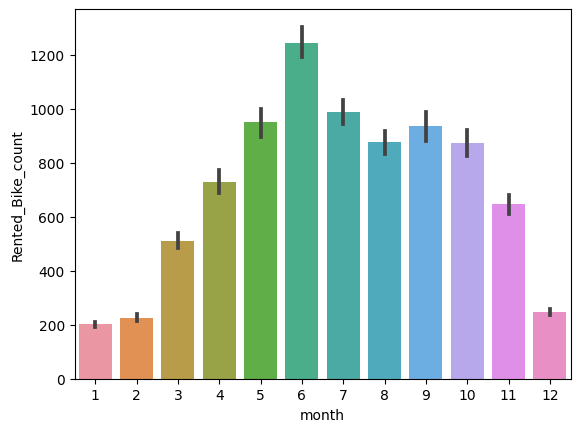

In [14]:
# Chart - 1 visualization code
# Creating visualization on month column

sns.barplot(data=bike_df,x='month',y='Rented_Bike_count').set_title=('Count of rented bikes on month basis')

##### 1. Are there any insight(s) found from the chart?

*  From the above plot, we get that the count of rented bike were high on summer time which is around the months of May-July.

#### Chart - 2

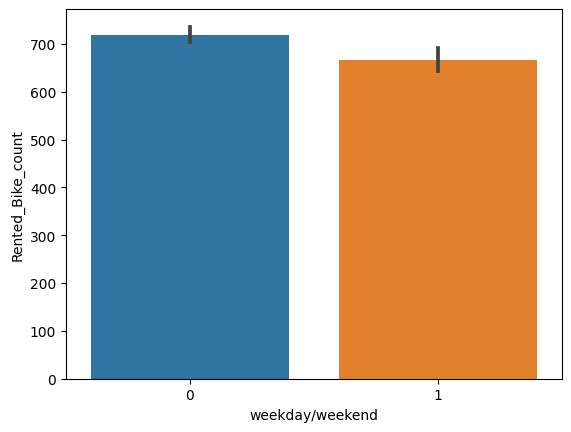

In [ ]:
# Chart - 2 visualization code

sns.barplot(data=bike_df,x='weekday/weekend',y='Rented_Bike_count').set_title=('Count of bikes on weekday/weekend')

##### 1. Are there any insight(s) found from the chart?

* From the chart we clearly see that the demand of bikes were high in weekdays.

#### Chart - 3

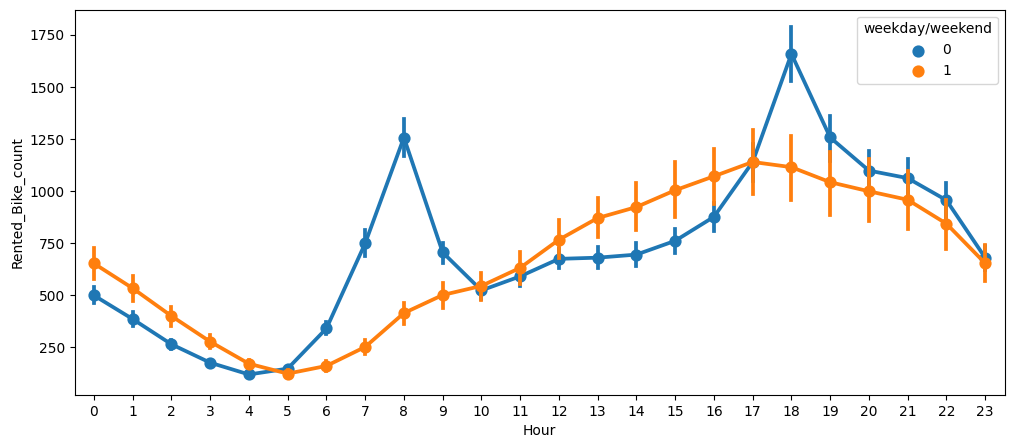

In [ ]:
# Chart - 3 visualization code
fig, ax = plt.subplots(figsize=(12, 5))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_count',hue='weekday/weekend',ax=ax)
ax.set_title=('Count of bikes rented on hour basis')

##### 1. Are there any insight(s) found from the chart?

* In the above chart blue line represents the weekdays which shows the demand is high on two points which is 7-9 AM and 5-7 PM that might be to and fro travel from office to home.

* Whereas Orange line represents the demand on weekends which shows the count of bike rental is increasing at evening time (3-7 PM)


#### Chart - 4

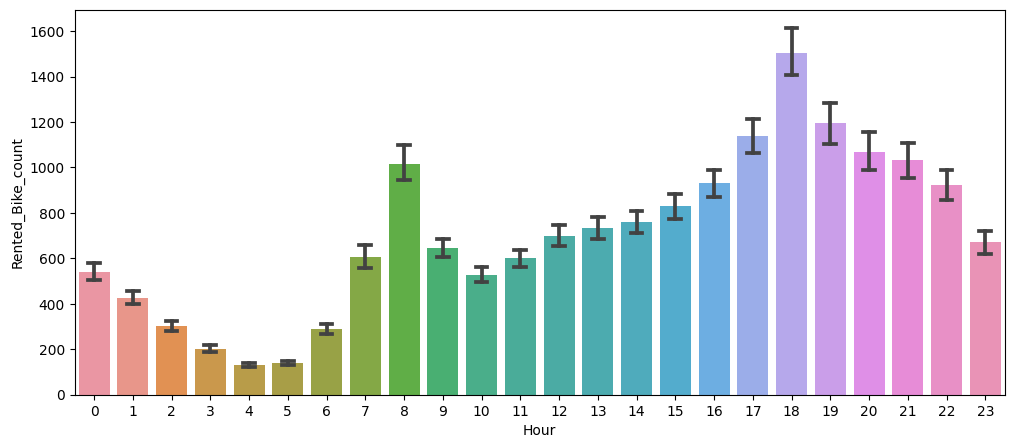

In [ ]:
# Chart - 4 visualization code
fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(data=bike_df,x='Hour',y='Rented_Bike_count',ax=ax,capsize=0.3)
ax.set_title=('Count of bikes rented on hour basis')


* From the plot we came to know that use of rented bikes are steadily increasing in the points like (7-9 AM) and (5-7 PM).

#### Chart - 5

Text(0.5, 1.0, 'Count of bikes rented on Functioning_Day')

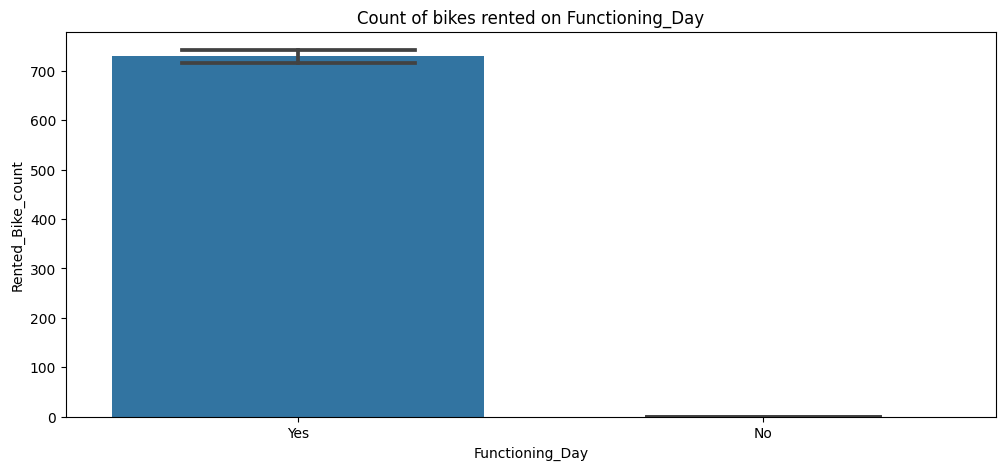

In [ ]:
# Chart - 5 visualization code

fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(data=bike_df,x='Functioning_Day',y='Rented_Bike_count',ax=ax,capsize=.5)
ax.set_title('Count of bikes rented on Functioning_Day')

Text(0.5, 1.0, 'Count of bikes rented on Functioning_Day')

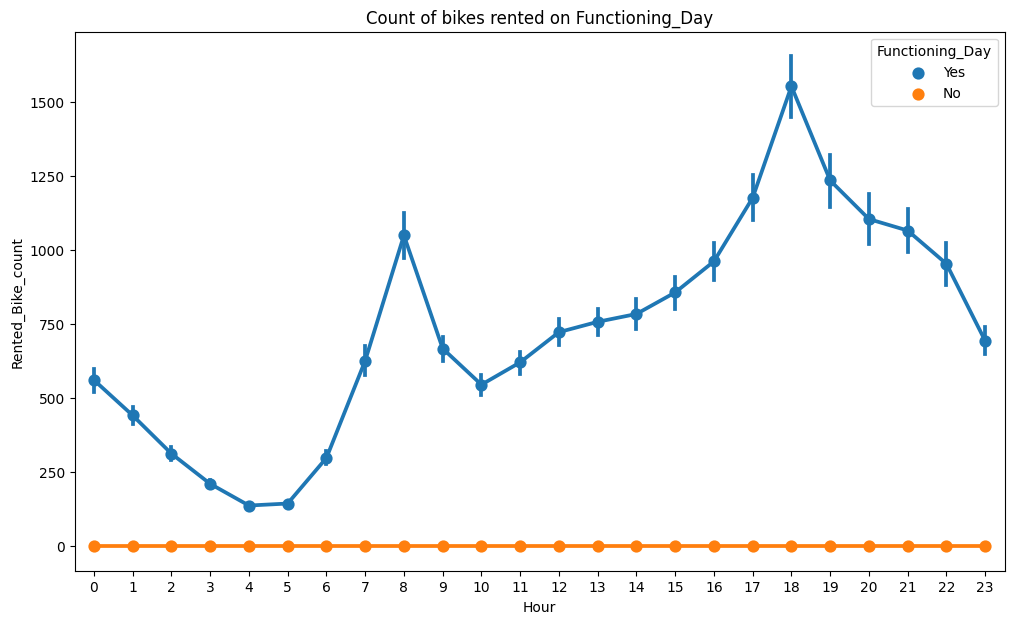

In [ ]:
# Chart - 6 visualization code

fig, ax = plt.subplots(figsize=(12, 7))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_count',hue='Functioning_Day',ax=ax)
ax.set_title('Count of bikes rented on Functioning_Day')

##### 1. Are there any insight(s) found from the chart?

* From the charts, we clear see that there is no demand for rented bikes on Non-Functioning Day.

#### Chart - 7

Text(0.5, 1.0, 'Season wise rented bike counts')

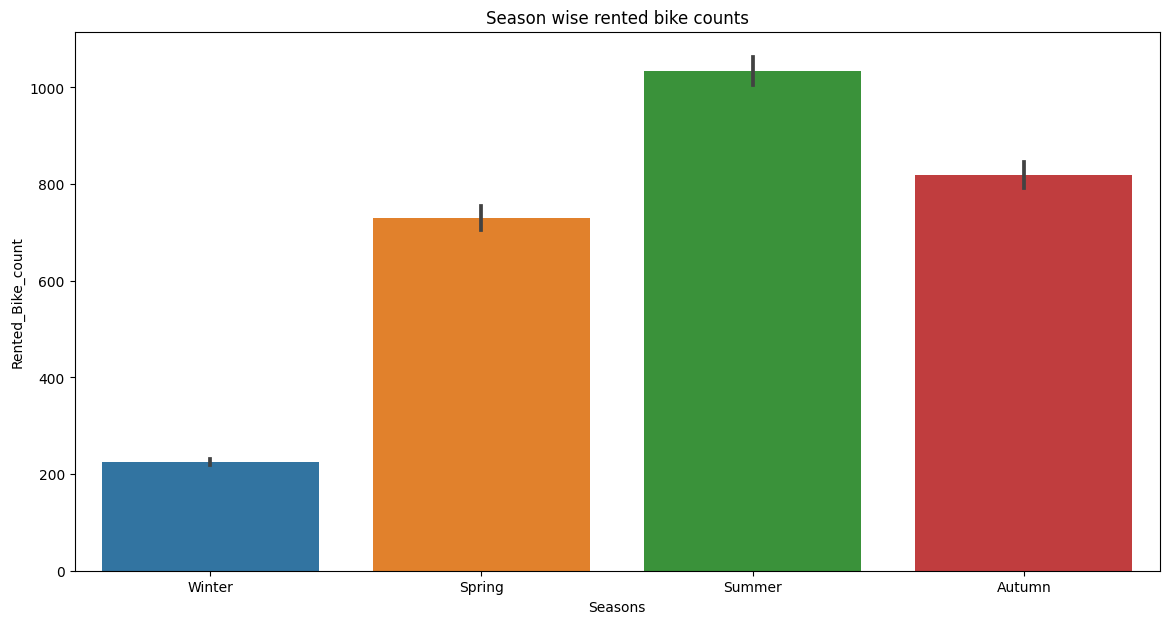

In [ ]:
# Chart - 7 visualization code

fig,ax=plt.subplots(figsize=(14,7))
sns.barplot(data=bike_df,x='Seasons',y='Rented_Bike_count',ax=ax)
ax.set_title('Season wise rented bike counts')

#### Chart - 8

Text(0.5, 1.0, 'Count of bikes rented on different Seasons')

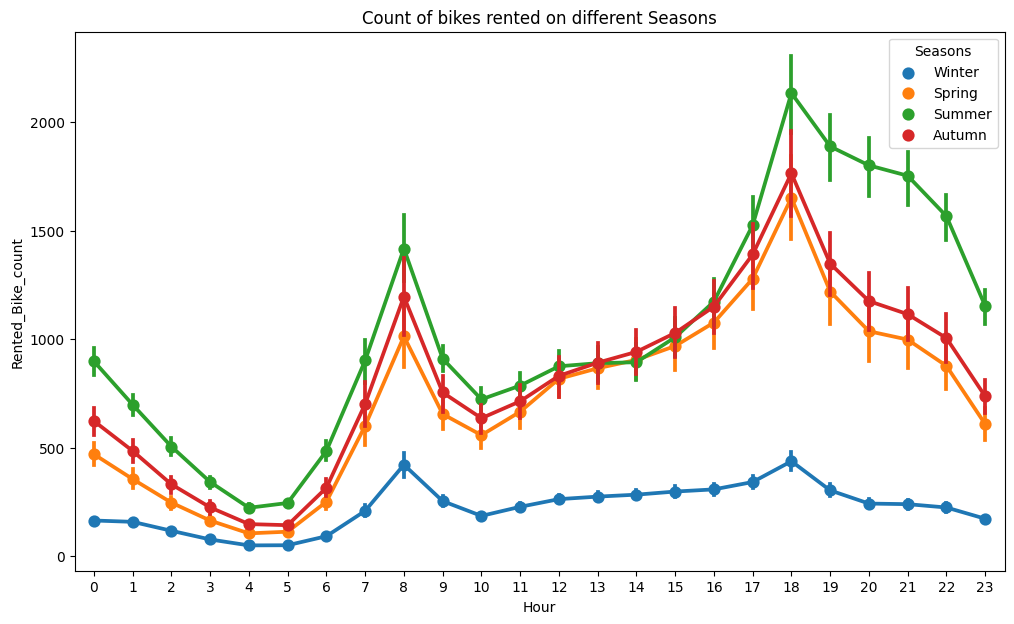

In [ ]:
# Chart - 8 visualization code

fig, ax = plt.subplots(figsize=(12, 7))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_count',hue='Seasons',ax=ax)
ax.set_title('Count of bikes rented on different Seasons')

##### 1. Are there any insight(s) found from the chart?

* From the above charts we clearly see that the demands were high in the summer season whereas it was very low in winter season.

* In the summer also peak times are as usual office timings which is 7-9 AM and 5-7 PM.

#### Chart - 9

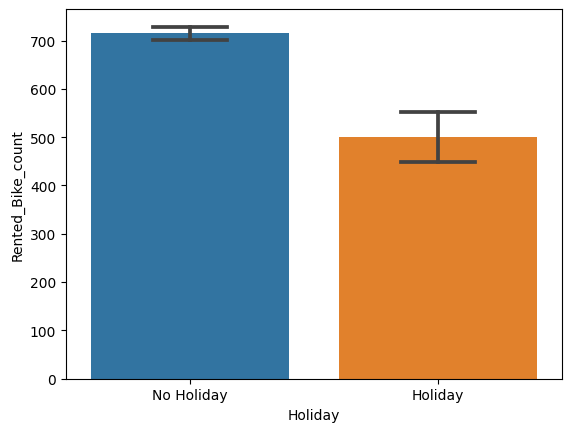

In [ ]:
# Chart - 9 visualization code

sns.barplot(data=bike_df,x='Holiday',y='Rented_Bike_count',capsize=.3).set_title=('Count of bikes on Holidays')

#### Chart - 10

Text(0.5, 1.0, 'Count of hour-wise bikes rented on Holidays')

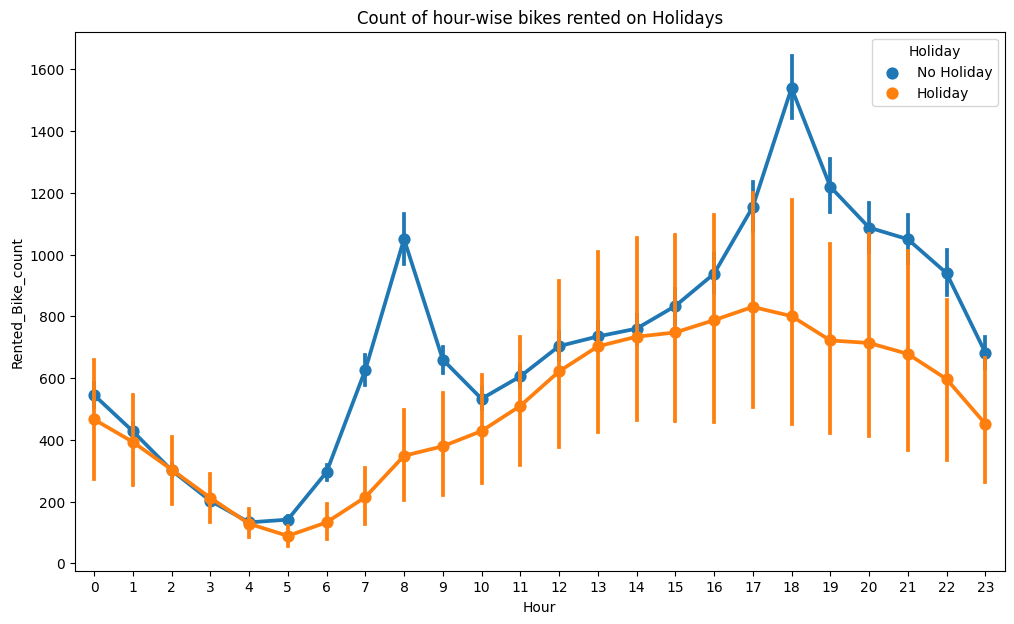

In [ ]:
# Chart - 10 visualization code

fig, ax = plt.subplots(figsize=(12, 7))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_count',hue='Holiday',ax=ax)
ax.set_title('Count of hour-wise bikes rented on Holidays')

##### 1. Are there any insight(s) found from the chart?

* From the above barplot and pointplot, we clearly see that use of rented bikes are higher on Non-holidays and in holidays usage is high on hours around 2-8 PM.

#### Analysis of Numerical variables on Distribution plots

In [ ]:
# Chart - 11 visualization code
numerical_columns = list(bike_df.select_dtypes(['int64','float64']).columns)
numerical_features = pd.Index(numerical_columns)
numerical_features

Index(['Rented_Bike_count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall'],
      dtype='object')

<ipython-input-41-7f3ee7c08662>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=bike_df[col])
<ipython-input-41-7f3ee7c08662>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=bike_df[col])
<ipython-input-41-7f3ee7c08662>:3: UserWarning: 

`distplot` is a deprecated function and will be remo

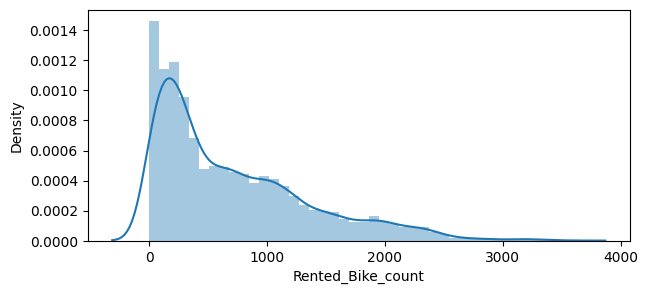

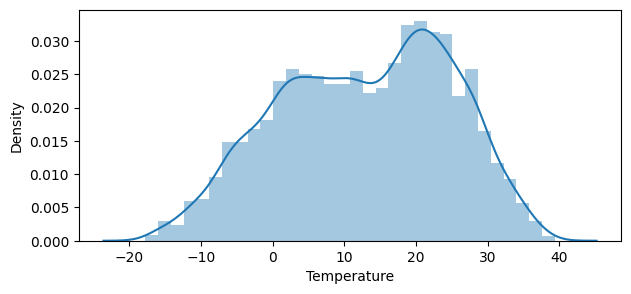

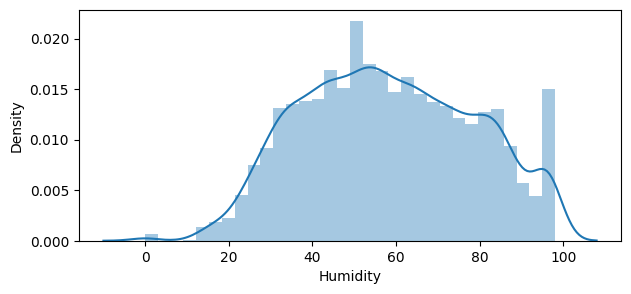

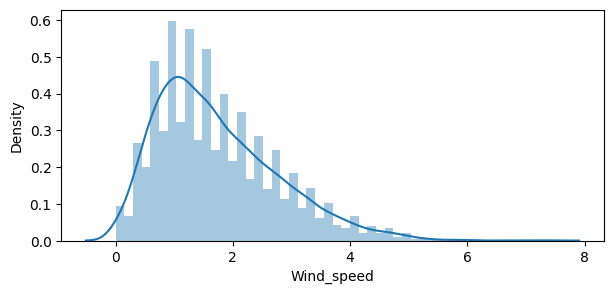

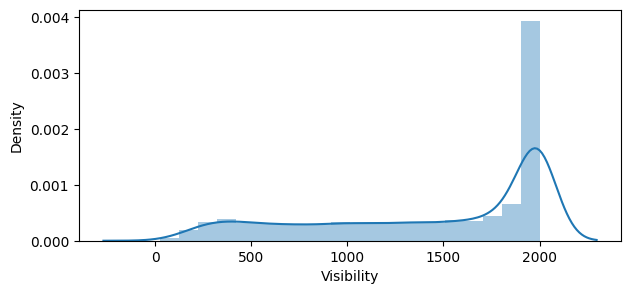

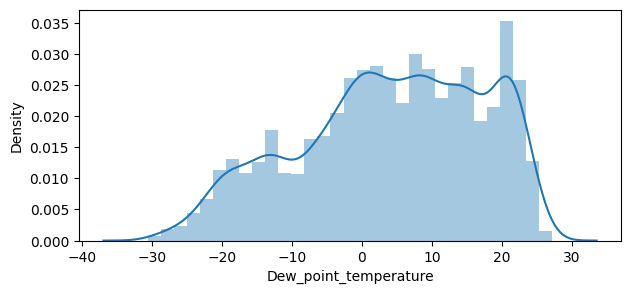

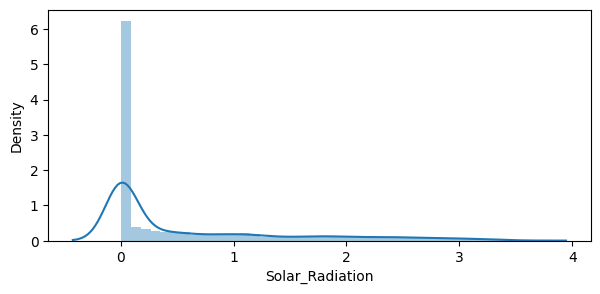

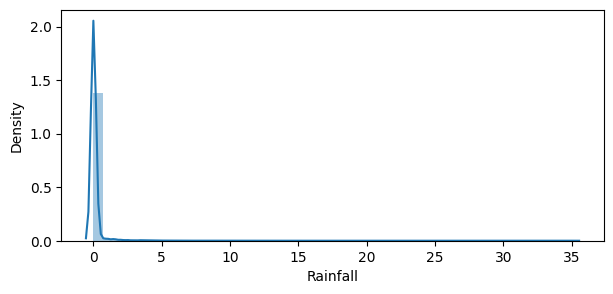

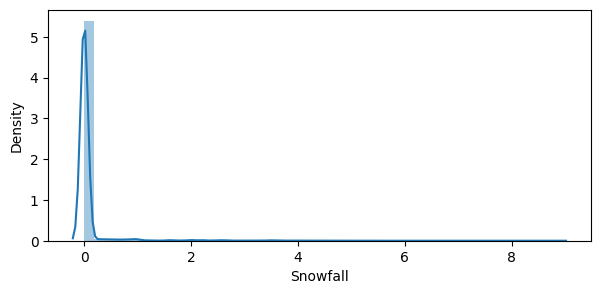

In [ ]:
for col in numerical_features :
  plt.figure(figsize=(7,3))
  sns.distplot(x=bike_df[col])
  plt.xlabel(col)
plt.show()

##### 1. Are there any insight(s) found from the chart?

From the above displot we found that how much skewness are there in the data,


1.   Right Skewed Columns - Rented_Bike_count, Wind speed, Solar radiation, Snowfall, Rainfall  
2.   Left Skewed Columns - Visibility, Dew point temperature


**Now we have to find how much numerical features are related to dependent variable.**

#### Numerical Columns VS Rented_Bike_count

<ipython-input-42-c3b258d51c5e>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bike_df.groupby('Temperature').mean()['Rented_Bike_count'].plot()


<Axes: xlabel='Temperature'>

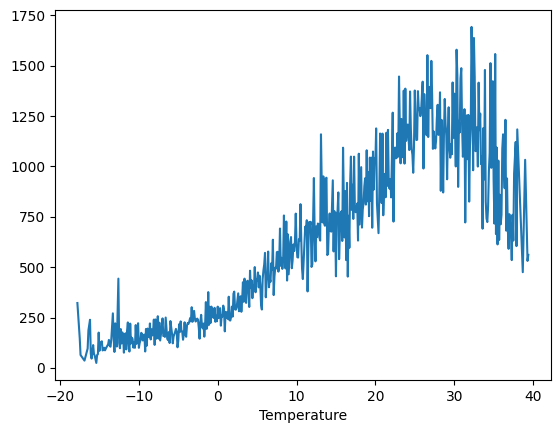

In [ ]:
# Visualization code to analyse the relationship b/w "Rented_Bike_count" and "Temperature"

bike_df.groupby('Temperature').mean()['Rented_Bike_count'].plot()

##### 1. Are there any insights that lead to analyse? Justify with specific reason.



*  From the above plot we get that the people like to rent the bikes mostly when the temperature is around 25 degree celsius.



#### Chart - 13

<ipython-input-43-592e2749980c>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bike_df.groupby('Solar_Radiation').mean()['Rented_Bike_count'].plot()


<Axes: xlabel='Solar_Radiation'>

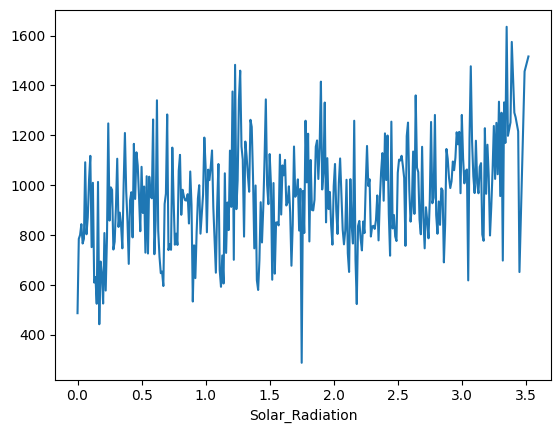

In [ ]:
# Visualization code to plot and analyse the relationship b/w "Rented_Bike_count" and "Solar Radiation"

bike_df.groupby('Solar_Radiation').mean()['Rented_Bike_count'].plot()


##### 1. Are there any insights that lead to analyse? Justify with specific reason.



*   From the above plot we see that, amount of rented bikes is huge when the solar radiation, the value is around 1000.





<ipython-input-44-961246e45791>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bike_df.groupby('Snowfall').mean()['Rented_Bike_count'].plot()


<Axes: xlabel='Snowfall'>

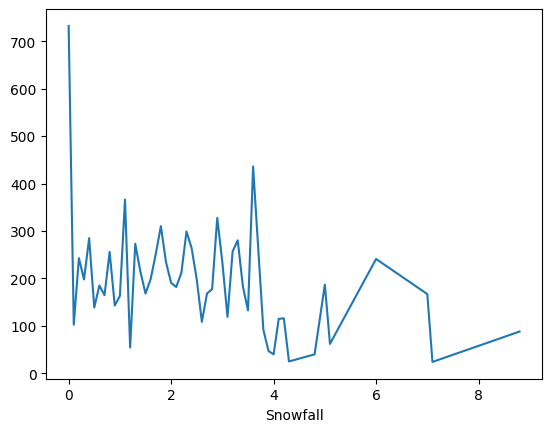

In [ ]:
# Visualization code to plot and analyse the relationship b/w "Rented_Bike_count" and " Snowfall "

bike_df.groupby('Snowfall').mean()['Rented_Bike_count'].plot()

### 1. Are there any insights that lead to analyse? Justify with specific reason.


* We can see the plot shows that count of rented bikes are High when snowfall is Low and Moderate when snowfall is Average then Low when snowfall is above 4 cm

<ipython-input-45-f8f9d8628302>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bike_df.groupby('Rainfall').mean()['Rented_Bike_count'].plot()


<Axes: xlabel='Rainfall'>

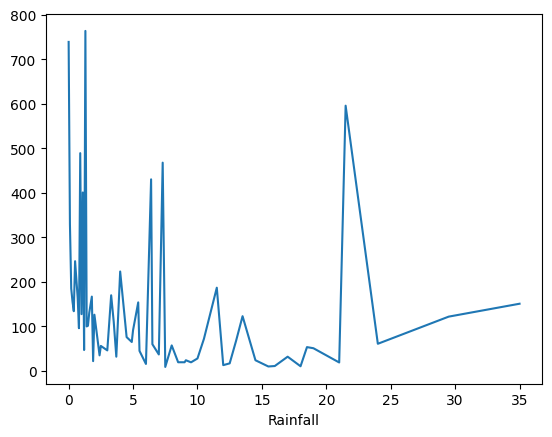

In [ ]:
# Visualization code to plot and analyse the relationship b/w "Rented_Bike_count" and " Rainfall "

bike_df.groupby('Rainfall').mean()['Rented_Bike_count'].plot()

### 1. Are there any insights that lead to analyse? Justify with specific reason.

* From the above plot we see that the count of bike rented are distributed in various amount of rainfall when the fall is low the counts are high likewise in and around 20mm rainfall also the count of bike rent is increasing.

<ipython-input-46-6de72250d623>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bike_df.groupby('Wind_speed').mean()['Rented_Bike_count'].plot()


<Axes: xlabel='Wind_speed'>

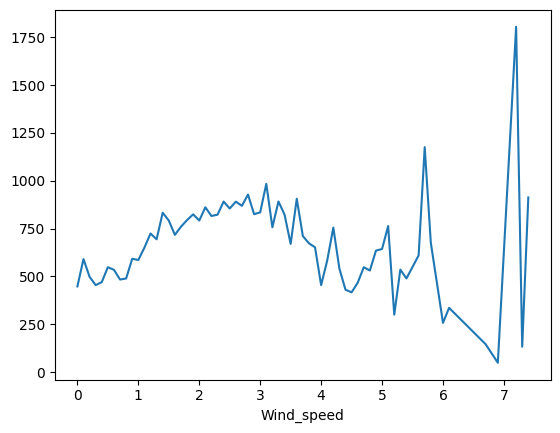

In [ ]:
# Visualization code to plot and analyse the relationship b/w "Rented_Bike_count" and " Wind_speed "

bike_df.groupby('Wind_speed').mean()['Rented_Bike_count'].plot()

### 1. Are there any insights that lead to analyse? Justify with specific reason.

* From the above plot we see that the count of bikes rented are uniformly distributed in all different wind speeds and the counts are increased when windspeed was around 7 m/s, Which means people love ride bikes in windy conditions.

**REGRESSION PLOT**



*   Regression plots as the name suggests creates a regression line between 2 parameters and helps to visualize their linear relationships. So that plots are used to analyse the relationships between the attributes of this dataset.




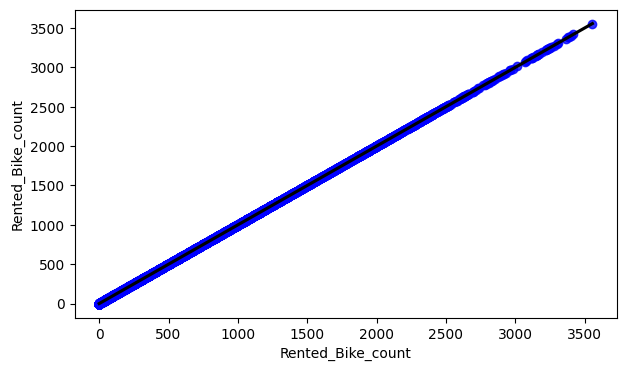

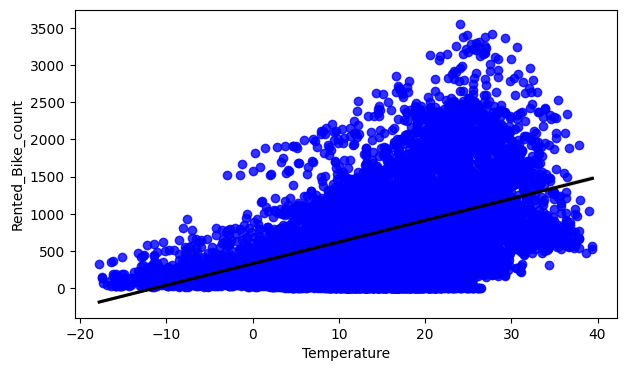

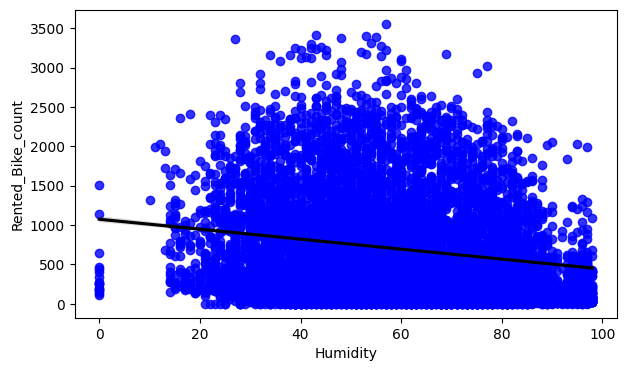

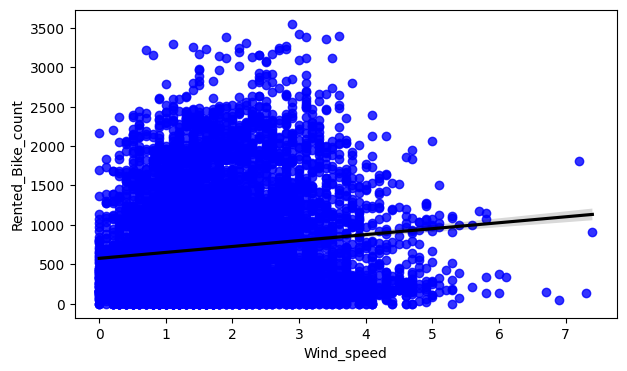

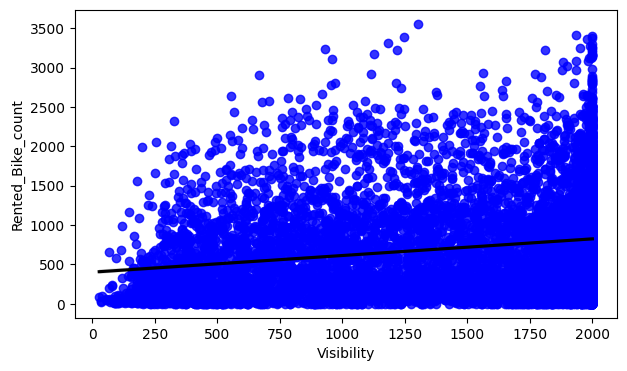

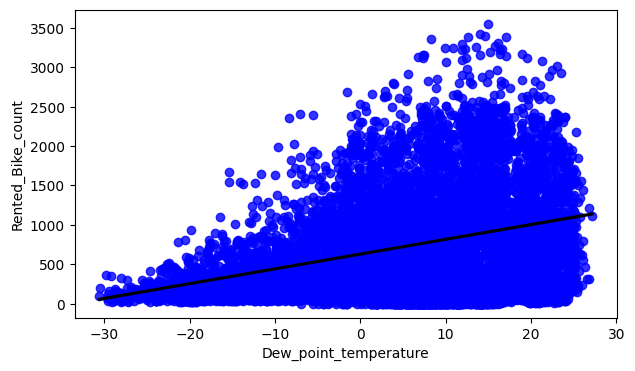

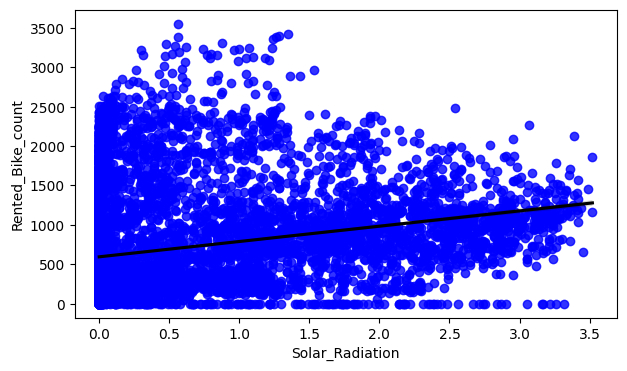

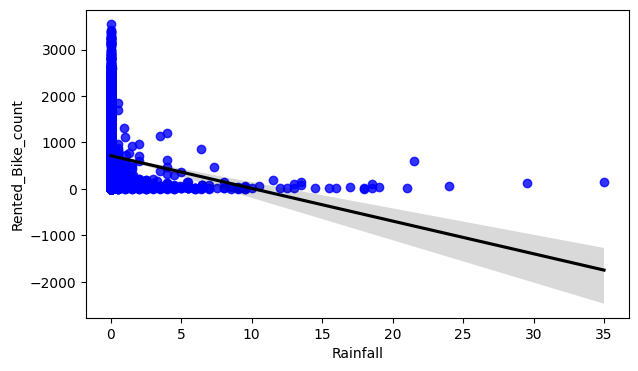

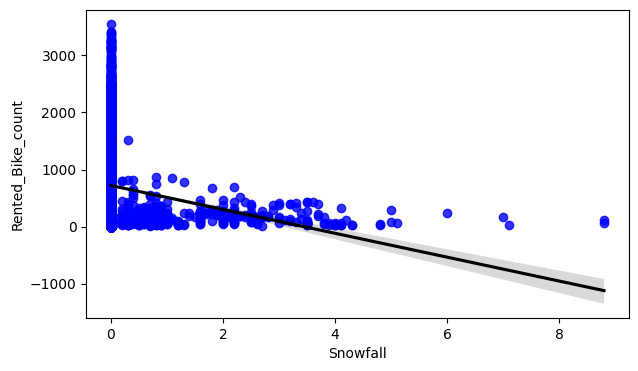

In [ ]:
#Creating visualization of regression plot for all the numerical features

for columns in numerical_features:
  fig,ax = plt.subplots(figsize=(7,4))
  sns.regplot(x=bike_df[columns], y=bike_df['Rented_Bike_count'],scatter_kws={'color' : 'blue'}, line_kws={'color' : 'black'})

**What is/are the insight(s) found from the chart?**



*   From these plots we clearly see that the columns like Temperature, Wind speed, visibility, Dew point temperature, Solar radiation are positively related to the Target variable "Rented_Bike_count"
*   Likewise the variables like Rainfall, Snowfall, Humidity are negatively related to the target variable which means the count decreases when the value of feature increases.



**Normalise the Target variable column data**

* Data normalization is a technique used in data mining to transform the values of a dataset into a common scale. This is important because many machine learning algorithms are sensitive to the scale of the input features and can produce better results when the data is normalized.

* It involves in transforming the data like converting the source data into other formats which allows to process data effectively.

* The main purpose of data normalization is to minimise or even exclude the duplicate values.

<ipython-input-48-2ba5e25f7902>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot=sns.distplot(bike_df['Rented_Bike_count'],hist=True)


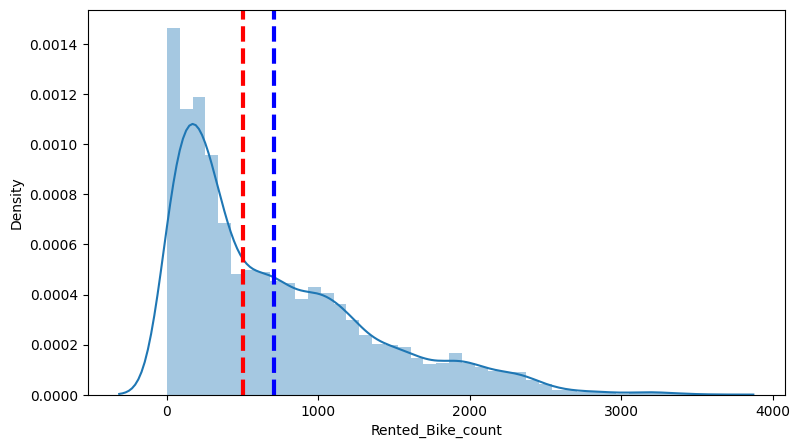

In [ ]:
# Distribution plot of rented bike count
plt.figure (figsize=(9,5))
plt.xlabel("Rented_Bike_Count")
plt.ylabel('Density')
plot=sns.distplot(bike_df['Rented_Bike_count'],hist=True)
plot.axvline(bike_df['Rented_Bike_count'].mean(),color='blue',linestyle='dashed',linewidth=3)
plot.axvline(bike_df['Rented_Bike_count'].median(),color='red',linestyle='dashed',linewidth=3)
plt.show()

* The above graph shows that, Rented_Bike_count has moderate amount of right skewness. Since the assumption of linear regression is that the distribution of dependent variable has to be normal, so we should perform some operation to make it normal.

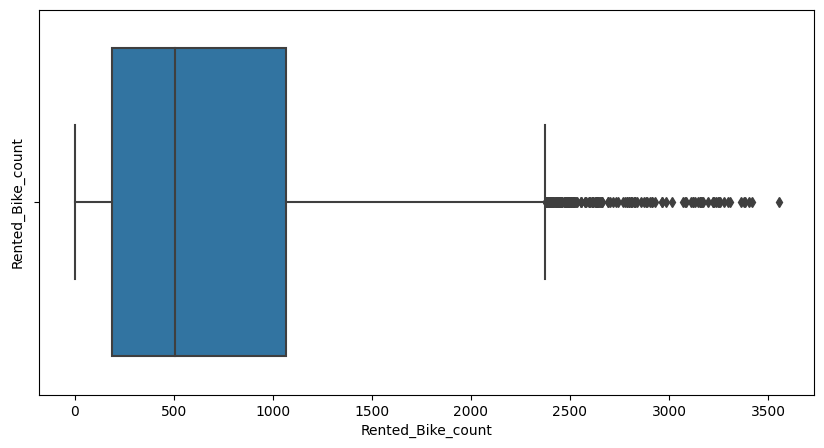

In [ ]:
#Finding the outliers and its treatment
#Boxplot for target value to find outliers
plt.figure(figsize=(10,5))
sns.boxplot(x=bike_df['Rented_Bike_count'])
plt.ylabel('Rented_Bike_count')
plt.show()

In [ ]:
#outliers treatment
bike_df.loc[bike_df['Rainfall']>=4,'Rainfall']=4
bike_df.loc[bike_df['Solar_Radiation']>=2.5,'Solar_Radiation']=2.5
bike_df.loc[bike_df['Snowfall']>=2,'Snowfall']=2
bike_df.loc[bike_df['Wind_speed']>=4,'Wind_speed']=4

<ipython-input-51-f4e4a397a848>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot=sns.distplot(np.sqrt(bike_df['Rented_Bike_count']),hist=True)


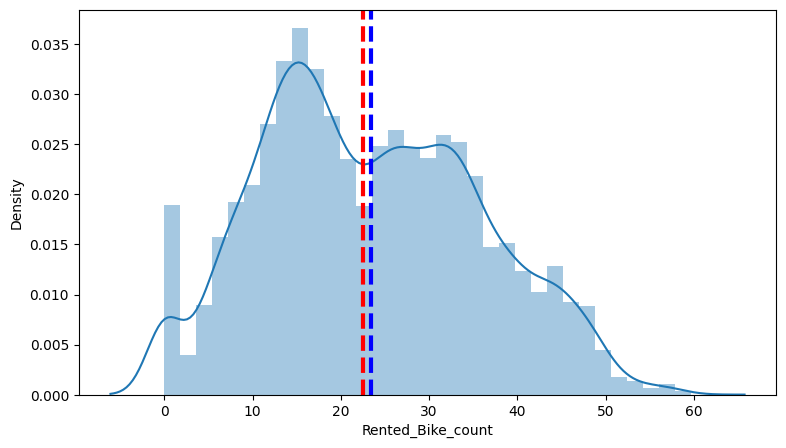

In [ ]:
#To improve the skewness we are applying square root to Rented bike count
plt.figure (figsize=(9,5))
plt.xlabel("Rented_Bike_Count")
plt.ylabel('Density')
plot=sns.distplot(np.sqrt(bike_df['Rented_Bike_count']),hist=True)
plot.axvline(np.sqrt(bike_df['Rented_Bike_count']).mean(),color='blue',linestyle='dashed',linewidth=3)
plot.axvline(np.sqrt(bike_df['Rented_Bike_count']).median(),color='red',linestyle='dashed',linewidth=3)
plt.show()

* Here we get after applying square root to the skewed Rented_Bike_count, here we get almost normal distribution.

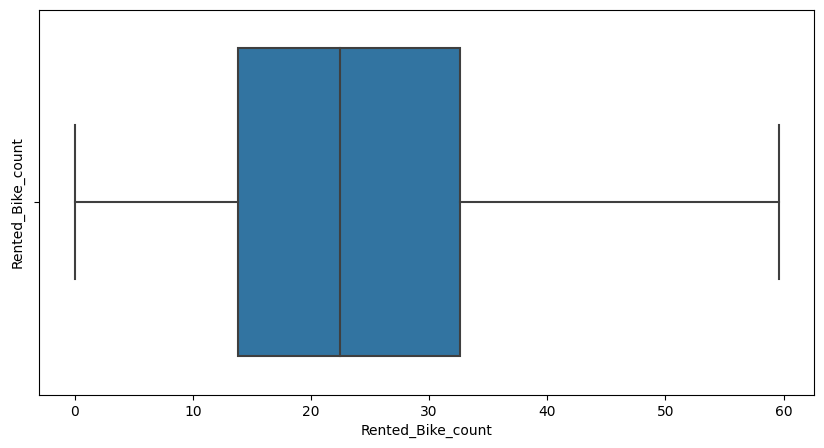

In [ ]:
#After applying the sqrt we are checking still are there any outliers
plt.figure(figsize=(10,5))
sns.boxplot(x=np.sqrt(bike_df['Rented_Bike_count']))
plt.ylabel('Rented_Bike_count')
plt.show()

* After applying square root, we clearly see that there are no outliers.

**Checking the Correlation between variables**

In [ ]:
bike_df.corr()

<ipython-input-53-ec47957aa79f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  bike_df.corr()


,Rented_Bike_count,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
Rented_Bike_count,1.000000,0.538558,-0.199780,0.131549,0.199280,0.379788,0.265658,-0.174224,-0.160917
Temperature,0.538558,1.000000,0.159371,-0.031368,0.034794,0.912798,0.350679,0.061274,-0.263134
Humidity,-0.199780,0.159371,1.000000,-0.341432,-0.543090,0.536894,-0.467236,0.331631,0.087086
Wind_speed,0.131549,-0.031368,-0.341432,1.000000,0.173683,-0.174233,0.342995,-0.038813,0.008140
Visibility,0.199280,0.034794,-0.543090,0.173683,1.000000,-0.176630,0.151105,-0.238378,-0.109306
Dew_point_temperature,0.379788,0.912798,0.536894,-0.174233,-0.176630,1.000000,0.090541,0.168386,-0.195743
Solar_Radiation,0.265658,0.350679,-0.467236,0.342995,0.151105,0.090541,1.000000,-0.105920,-0.080470
Rainfall,-0.174224,0.061274,0.331631,-0.038813,-0.238378,0.168386,-0.105920,1.000000,-0.002297
Snowfall,-0.160917,-0.263134,0.087086,0.008140,-0.109306,-0.195743,-0.080470,-0.002297,1.000000


In [15]:
bike_df.columns

Index(['Rented_Bike_count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day', 'month',
       'weekday/weekend'],
      dtype='object')

In [16]:
#Assigning the columns to X and Y variables

X = bike_df [['Temperature','Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall']]
Y = bike_df['Rented_Bike_count']


In [17]:
#importing the stats module and add a constant columns
import statsmodels.api as sm
X = sm.add_constant(X)
X

,const,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
0,1.0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,1.0,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,1.0,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,1.0,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,1.0,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8755,1.0,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,1.0,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,1.0,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,1.0,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


In [18]:
#fit an OLS Model
model = sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented_Bike_count   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     723.1
Date:                Sun, 01 Oct 2023   Prob (F-statistic):               0.00
Time:                        15:03:02   Log-Likelihood:                -66877.
No. Observations:                8760   AIC:                         1.338e+05
Df Residuals:                    8751   BIC:                         1.338e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   844.6495    106.296      7.946      0.000     636.285    1053.014
Temperature              36.5270      4.169      8.762      0.000      28.355      44.699
Humidity                -10.5077      1.184     -8.872      0.000     -12.829      -8.186
Wind_speed               52.4810      5.661      9.271      0.000      41.385      63.577
Visibility               -0.0097      0.011     -0.886      0.376      -0.031       0.012
Dew_point_temperature    -0.7829      4.402     -0.178      0.859      -9.411       7.846
Solar_Radiation        -118.9772      8.670    -13.724      0.000    -135.971    -101.983
Rainfall                -50.7083      4.932    -10.282      0.000     -60.376     -41.041
Snowfall                 41.0307     12.806      3.204      0.001      15.929      66.133
==============================================================================
Omnibus:                      957.371   Durbin-Watson:                   0.338
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1591.019
Skew:                           0.769   Prob(JB):                         0.00
Kurtosis:                       4.412   Cond. No.                     3.11e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
X.corr()

,const,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,NaN,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity,NaN,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind_speed,NaN,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility,NaN,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew_point_temperature,NaN,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar_Radiation,NaN,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall,NaN,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall,NaN,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


#### Chart - 14 - Correlation Heatmap

* It is a type of graphical representation that displays the correlation between the variables using a matrix.

<ipython-input-59-f44402e53da9>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(bike_df.corr(),annot=True)


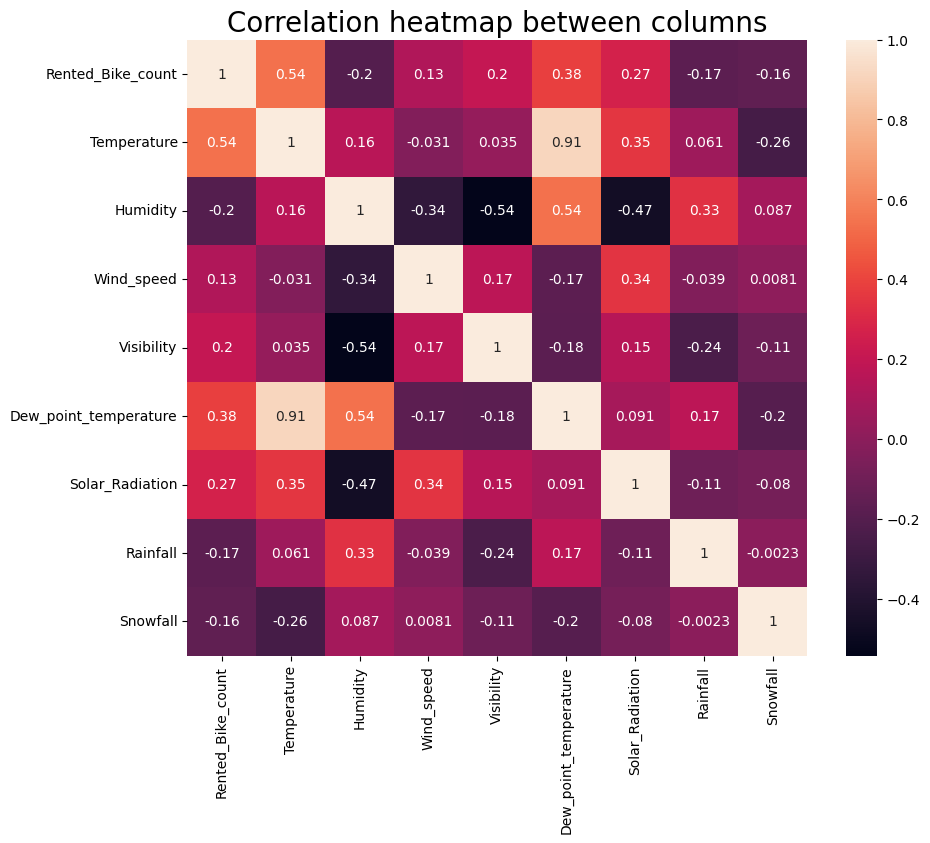

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(10,8))

#creating correlation heatmap with numeric values
sns.heatmap(bike_df.corr(),annot=True)

#creating visualization and setting title
plt.title('Correlation heatmap between columns',fontsize=20)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

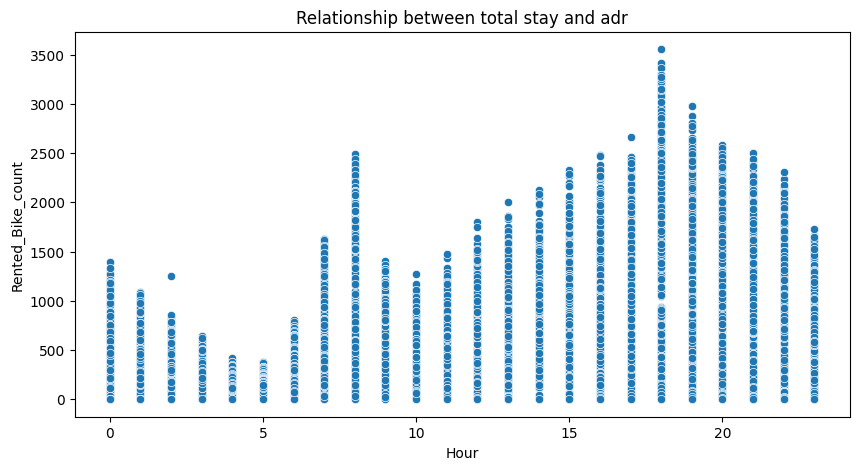

In [ ]:
# Pair Plot visualization code

#Creating scatter plot by defining size,plot values and title
plt.figure(figsize=(10,5))
sns.scatterplot(x=bike_df['Hour'],y=bike_df['Rented_Bike_count'])
plt.title('Relationship between total stay and adr')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

In [13]:
# we're dropping the Dew point temperature column
bike_df = bike_df.drop(['Dew_point_temperature'],axis=1)
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Rented_Bike_count  8760 non-null   int64   
 1   Hour               8760 non-null   category
 2   Temperature        8760 non-null   float64 
 3   Humidity           8760 non-null   int64   
 4   Wind_speed         8760 non-null   float64 
 5   Visibility         8760 non-null   int64   
 6   Solar_Radiation    8760 non-null   float64 
 7   Rainfall           8760 non-null   float64 
 8   Snowfall           8760 non-null   float64 
 9   Seasons            8760 non-null   object  
 10  Holiday            8760 non-null   object  
 11  Functioning_Day    8760 non-null   object  
 12  month              8760 non-null   category
 13  weekday/weekend    8760 non-null   category
dtypes: category(3), float64(5), int64(3), object(3)
memory usage: 779.8+ KB


## ***5. Feature Engineering & Data Pre-processing***

In [15]:
#Assign all categorical features to variable
categorical_features = list(bike_df.select_dtypes(['object','category']).columns)
categorical_features = pd.Index(categorical_features)
categorical_features

Index(['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'month',
       'weekday/weekend'],
      dtype='object')

**One hot encoding**

In [16]:
#Creating the copy to move forward with feature engineering
copy_bike_df = bike_df

def one_hot_encoding(data,column):
  data = pd.concat([data,pd.get_dummies(data[column],prefix=column,drop_first=True)],axis=1)
  data = data.drop([column],axis=1)
  return data

for col in categorical_features:
  copy_bike_df = one_hot_encoding(copy_bike_df,col)

In [17]:
copy_bike_df.head()

,Rented_Bike_count,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekday/weekend_1
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Data Splitting

In [18]:
# Assigning X and Y values
x = copy_bike_df.drop(columns=['Rented_Bike_count'],axis=1)
y = np.sqrt(copy_bike_df['Rented_Bike_count'])

In [19]:
x.head(2)

,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,Hour_3,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekday/weekend_1
0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [20]:
y.head(2)

0    15.937377
1    14.282857
Name: Rented_Bike_count, dtype: float64

In [21]:
# Split your data to train and test. Choose Splitting ratio wisely.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)
print(x_train.shape)
print(x_test.shape)

(6132, 47)
(2628, 47)


In [22]:
copy_bike_df.columns

Index(['Rented_Bike_count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Hour_1',
       'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8',
       'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14',
       'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20',
       'Hour_21', 'Hour_22', 'Hour_23', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Holiday_No Holiday', 'Functioning_Day_Yes',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'weekday/weekend_1'],
      dtype='object')

## ***6. ML Model Implementation***

### ML Model - 1 (Linear Regression)

In [33]:
# ML Model - 1 Implementation

# Fit the Algorithm
reg = LinearRegression().fit(x_train,y_train)
# Predict on the model
reg.score(x_train,y_train)

0.7735538545244831

In [34]:
reg.coef_

array([ 5.06409442e-01, -1.31832585e-01, -2.95726531e-02,  9.94007084e-04,
        8.31713759e-01, -1.49348764e+00, -5.37062680e-02, -2.25126487e+00,
       -4.99006373e+00, -7.35905711e+00, -9.49479022e+00, -8.97758528e+00,
       -4.04211743e+00,  2.32874842e+00,  7.48265247e+00,  1.14220456e+00,
       -3.26382769e+00, -3.62210895e+00, -2.89996452e+00, -2.94011118e+00,
       -3.29743736e+00, -2.08789080e+00,  1.79520578e-01,  3.65430099e+00,
        1.00931648e+01,  6.65353785e+00,  5.83638625e+00,  6.16960119e+00,
        4.88538499e+00,  1.27464572e+00, -3.12529632e+09,  7.32848255e+09,
       -3.19597701e+09,  3.67478997e+00,  2.82525975e+01, -7.25154628e-01,
       -7.06806874e+07, -7.06806866e+07, -7.06806839e+07, -1.05244595e+10,
       -1.05244596e+10, -1.05244596e+10, -3.19597700e+09, -3.19597700e+09,
       -3.19597700e+09,  2.07090954e+00, -1.38817613e+00])

In [35]:
#Get the X_train and X_test value
y_pred_train = reg.predict(x_train)
y_pred_test = reg.predict(x_test)

In [36]:
#Calculate MSE
MSE = mean_squared_error(y_train,y_pred_train)
print('MSE :',MSE)

#Calculate RMSE
RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

#Calculate MAE
MAE = mean_absolute_error(y_train,y_pred_train)
print('MAE :',MAE)

#Calculate r2_score
R2 = r2_score(y_train,y_pred_train)
print('r2_score :',R2)

#Calculate Adjusted r2_score
adjusted_r2_score = (1-(1-r2_score(y_train,y_pred_train))*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('Adjusted R2 :',adjusted_r2_score)


MSE : 35.224265900543436
RMSE : 5.935003445706113
MAE : 4.479618816247486
r2_score : 0.7735538545244831
Adjusted R2 : 0.7694286728045803


In [37]:
#Storing the metric values in a dataframe
dict1 = {'Model' : 'Linear Regression',
         'MSE' : round(MSE,3),
         'RMSE' : round(RMSE,3),
         'MAE' : round(MAE,3),
         'r2_Score' : round(R2,3),
         'Adjusted R2' : round(adjusted_r2_score,3)
}
training_df = pd.DataFrame(dict1,index=[1])

In [38]:
#Calculate MSE
MSE = mean_squared_error(y_test,y_pred_test)
print('MSE :',MSE)

#Calculate RMSE
RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

#Calculate MAE
MAE = mean_absolute_error(y_test,y_pred_test)
print('MAE :',MAE)

#Calculate r2_score
R2 = r2_score(y_test,y_pred_test)
print('r2_score :',R2)

#Calculate Adjusted r2_score
adjusted_r2_score = (1-(1-r2_score(y_test,y_pred_test))*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('Adjusted R2 :',adjusted_r2_score)


MSE : 33.34785137966983
RMSE : 5.774759854718621
MAE : 4.428339821579641
r2_score : 0.7828888869222996
Adjusted R2 : 0.77893376199414


In [39]:
#For comparing the values, we are storing the metric values in a dataframe
dict2 = {'Model' : 'Linear Regression',
         'MSE' : round(MSE,3),
         'RMSE' : round(RMSE,3),
         'MAE' : round(MAE,3),
         'r2_Score' : round(R2,3),
         'Adjusted R2' : round(adjusted_r2_score,3)
}
test_df = pd.DataFrame(dict2,index=[1])

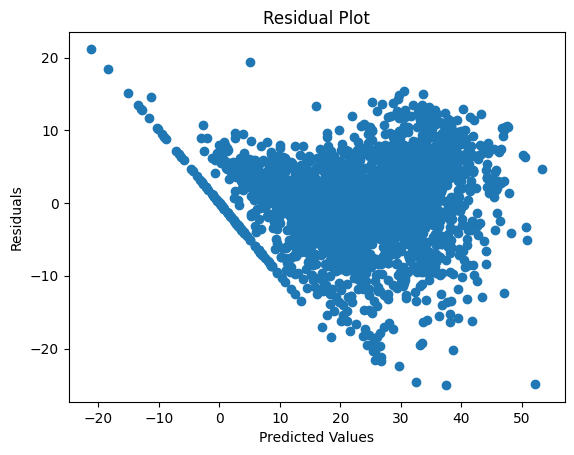

In [40]:
#Heteroscadacity - Residual Plot
plt.scatter((y_pred_test),(y_test)-(y_pred_test))
plt.xlabel("Predicted Values")
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

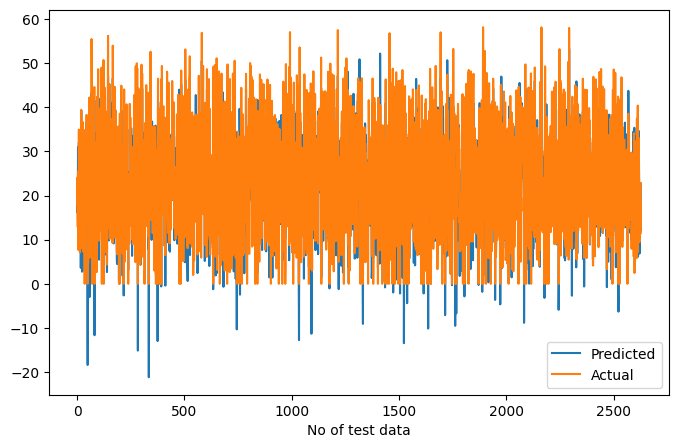

In [41]:
#Actual vs Prediction for Linear Regression Plot
plt.figure(figsize=(8,5))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(['Predicted','Actual'])
plt.xlabel('No of test data')
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [42]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [116]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
cv_score = np.mean(cross_val_score(lr, x_train, y_train, cv=5))

print('CV Score',cv_score)

CV Score 0.7686818274722984


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2 (Lasso Regression)

In [44]:
#Creating Lasso Regression Model
lasso = Lasso(alpha=1.0, max_iter=3000)
lasso.fit(x_train,y_train)

Lasso(max_iter=3000)

In [45]:
#Checking the model score
print(lasso.score(x_test,y_test),lasso.score(x_train,y_train))

0.3922842252365728 0.4046891968249039


In [46]:
#Get the X_train and X_test value
y_pred_train_lasso = lasso.predict(x_train)
y_pred_test_lasso = lasso.predict(x_test)

In [47]:
#Calculate MSE
MSE = mean_squared_error(y_train,y_pred_train_lasso)
print('MSE :',MSE)

#Calculate RMSE
RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

#Calculate MAE
MAE = mean_absolute_error(y_train,y_pred_train_lasso)
print('MAE :',MAE)

#Calculate r2_score
R2 = r2_score(y_train,y_pred_train_lasso)
print('r2_score :',R2)

#Calculate Adjusted r2_score
adjusted_r2_score = (1-(1-r2_score(y_train,y_pred_train_lasso))*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('Adjusted R2 :',adjusted_r2_score)

MSE : 92.60208859140351
RMSE : 9.622997900415625
MAE : 7.286126565995105
r2_score : 0.4046891968249039
Adjusted R2 : 0.39384438761977614


In [48]:
#Storing the metric values in a dataframe
dict1 = {'Model' : 'Lasso Regression',
         'MSE' : round(MSE,3),
         'RMSE' : round(RMSE,3),
         'MAE' : round(MAE,3),
         'r2_Score' : round(R2,3),
         'Adjusted R2' : round(adjusted_r2_score,3)
}
training_df = training_df.append(dict1,ignore_index=True)

<ipython-input-48-56f2cd0d1f12>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  training_df = training_df.append(dict1,ignore_index=True)


In [49]:
#Calculate MSE
MSE = mean_squared_error(y_test,y_pred_test_lasso)
print('MSE :',MSE)

#Calculate RMSE
RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

#Calculate MAE
MAE = mean_absolute_error(y_test,y_pred_test_lasso)
print('MAE :',MAE)

#Calculate r2_score
R2 = r2_score(y_test,y_pred_test_lasso)
print('r2_score :',R2)

#Calculate Adjusted r2_score
adjusted_r2_score = (1-(1-r2_score(y_test,y_pred_test_lasso))*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('Adjusted R2 :',adjusted_r2_score)

MSE : 93.34397972819944
RMSE : 9.661468818362943
MAE : 7.3358839873346975
r2_score : 0.3922842252365728
Adjusted R2 : 0.3812134339908825


In [50]:
#Storing the metric values in a dataframe
dict2 = {'Model' : 'Lasso Regression',
         'MSE' : round(MSE,3),
         'RMSE' : round(RMSE,3),
         'MAE' : round(MAE,3),
         'r2_Score' : round(R2,3),
         'Adjusted R2' : round(adjusted_r2_score,3)
}
test_df = test_df.append(dict2,ignore_index=True)

<ipython-input-50-08d7f46720bf>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(dict2,ignore_index=True)


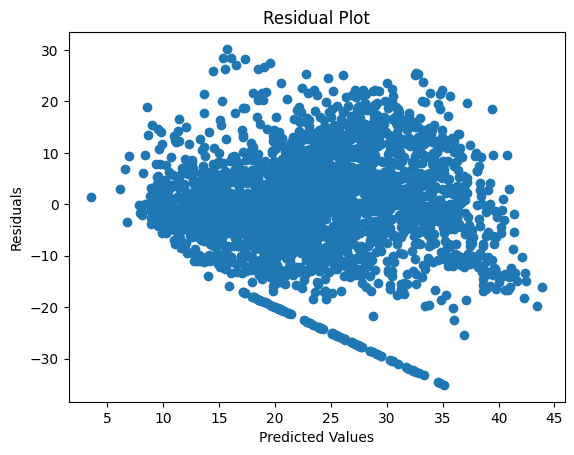

In [51]:
#Heteroscadacity - Residual Plot
plt.scatter((y_pred_test_lasso),(y_test)-(y_pred_test_lasso))
plt.xlabel("Predicted Values")
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

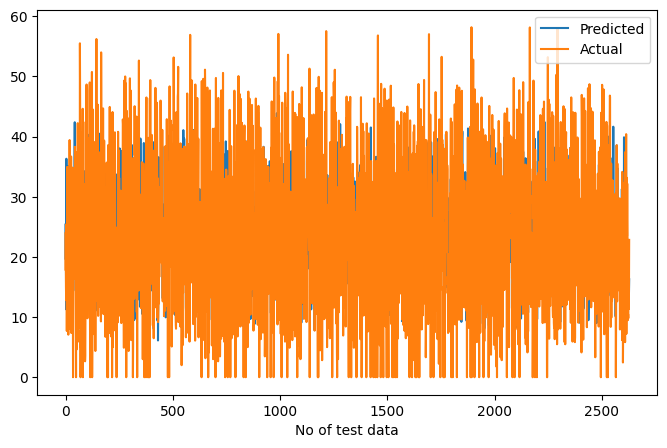

In [52]:
#Actual vs Prediction for Lasso Regression Plot
plt.figure(figsize=(8,5))
plt.plot(y_pred_test_lasso)
plt.plot(np.array(y_test))
plt.legend(['Predicted','Actual'])
plt.xlabel('No of test data')
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [53]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [54]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3 (Ridge Regression)

In [55]:
# ML Model - 3 Implementation
ridge = Ridge(alpha=1.0)

# Fit the Algorithm
ridge.fit(x_train,y_train)

# Predict on the model
ridge.score(x_train,y_train)


0.7735454616096854

In [56]:
#Get the X_train and X_test value
y_pred_train_ridge = ridge.predict(x_train)
y_pred_test_ridge = ridge.predict(x_test)

In [57]:
#Calculate MSE
MSE = mean_squared_error(y_train,y_pred_train_ridge)
print('MSE :',MSE)

#Calculate RMSE
RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

#Calculate MAE
MAE = mean_absolute_error(y_train,y_pred_train_ridge)
print('MAE :',MAE)

#Calculate r2_score
R2 = r2_score(y_train,y_pred_train_ridge)
print('r2_score :',R2)

#Calculate Adjusted r2_score
adjusted_r2_score = (1-(1-r2_score(y_train,y_pred_train_ridge))*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('Adjusted R2 :',adjusted_r2_score)

MSE : 35.22557143949131
RMSE : 5.935113431055156
MAE : 4.480837959578802
r2_score : 0.7735454616096854
Adjusted R2 : 0.7694201269955983


In [58]:
#Storing the metric values in a dataframe
dict1 = {'Model' : 'Ridge Regression',
         'MSE' : round(MSE,3),
         'RMSE' : round(RMSE,3),
         'MAE' : round(MAE,3),
         'r2_Score' : round(R2,3),
         'Adjusted R2' : round(adjusted_r2_score,3)
}
training_df = training_df.append(dict1,ignore_index=True)

<ipython-input-58-c780a506cdae>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  training_df = training_df.append(dict1,ignore_index=True)


In [59]:
#Calculate MSE
MSE = mean_squared_error(y_test,y_pred_test_ridge)
print('MSE :',MSE)

#Calculate RMSE
RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

#Calculate MAE
MAE = mean_absolute_error(y_test,y_pred_test_ridge)
print('MAE :',MAE)

#Calculate r2_score
R2 = r2_score(y_test,y_pred_test_ridge)
print('r2_score :',R2)

#Calculate Adjusted r2_score
adjusted_r2_score = (1-(1-r2_score(y_test,y_pred_test_ridge))*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('Adjusted R2 :',adjusted_r2_score)

MSE : 33.36597552246193
RMSE : 5.776328896666284
MAE : 4.430841800544817
r2_score : 0.7827708897305055
Adjusted R2 : 0.7788136152410999


In [60]:
#Storing the metric values in a dataframe
dict2 = {'Model' : 'Ridge Regression',
         'MSE' : round(MSE,3),
         'RMSE' : round(RMSE,3),
         'MAE' : round(MAE,3),
         'r2_Score' : round(R2,3),
         'Adjusted R2' : round(adjusted_r2_score,3)
}
test_df = test_df.append(dict2,ignore_index=True)

<ipython-input-60-7dbdd332fc80>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(dict2,ignore_index=True)


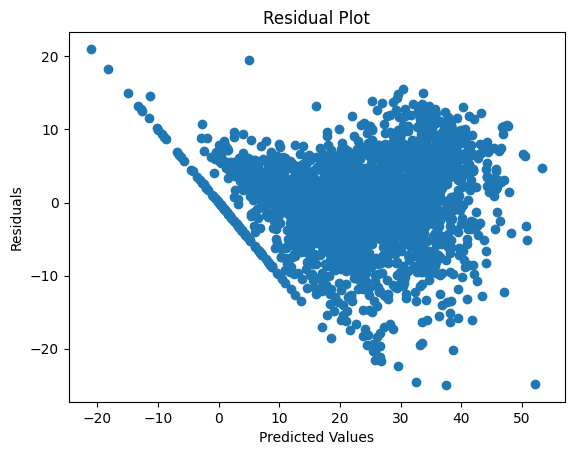

In [61]:
#Heteroscadacity - Residual Plot
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge))
plt.xlabel("Predicted Values")
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

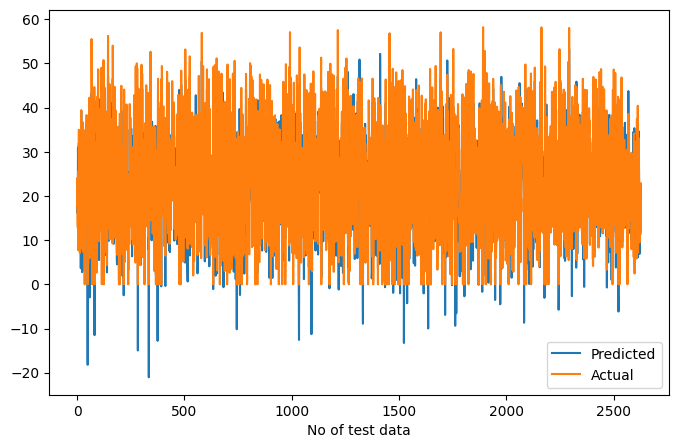

In [62]:
#Actual vs Prediction for Ridge Regression Plot
plt.figure(figsize=(8,5))
plt.plot(y_pred_test_ridge)
plt.plot(np.array(y_test))
plt.legend(['Predicted','Actual'])
plt.xlabel('No of test data')
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [63]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [64]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

### ML Model - 4 (ElasticNet Regression)

In [65]:
# ML Model - 4 Implementation
elasticnet = ElasticNet(alpha=1.0,l1_ratio=0.5)

# Fit the Algorithm
elasticnet.fit(x_train,y_train)

# Predict on the model
elasticnet.score(x_train,y_train)

0.4126771299334133

In [66]:
#Get the X_train and X_test value
y_pred_train_elasticnet = elasticnet.predict(x_train)
y_pred_test_elasticnet = elasticnet.predict(x_test)

In [67]:
#Calculate MSE
MSE = mean_squared_error(y_train,y_pred_train_elasticnet)
print('MSE :',MSE)

#Calculate RMSE
RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

#Calculate MAE
MAE = mean_absolute_error(y_train,y_pred_train_elasticnet)
print('MAE :',MAE)

#Calculate r2_score
R2 = r2_score(y_train,y_pred_train_elasticnet)
print('r2_score :',R2)

#Calculate Adjusted r2_score
adjusted_r2_score = (1-(1-r2_score(y_train,y_pred_train_elasticnet))*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('Adjusted R2 :',adjusted_r2_score)

MSE : 91.359545561055
RMSE : 9.55821874415181
MAE : 7.25084277040763
r2_score : 0.4126771299334133
Adjusted R2 : 0.401977837339177


In [68]:
#Storing the metric values in a dataframe
dict1 = {'Model' : 'Elasticnet Regression',
         'MSE' : round(MSE,3),
         'RMSE' : round(RMSE,3),
         'MAE' : round(MAE,3),
         'r2_Score' : round(R2,3),
         'Adjusted R2' : round(adjusted_r2_score,3)
}
training_df = training_df.append(dict1,ignore_index=True)

<ipython-input-68-15627a4e6750>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  training_df = training_df.append(dict1,ignore_index=True)


In [69]:
#Calculate MSE
MSE = mean_squared_error(y_test,y_pred_test_elasticnet)
print('MSE :',MSE)

#Calculate RMSE
RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

#Calculate MAE
MAE = mean_absolute_error(y_test,y_pred_test_elasticnet)
print('MAE :',MAE)

#Calculate r2_score
R2 = r2_score(y_test,y_pred_test_elasticnet)
print('r2_score :',R2)

#Calculate Adjusted r2_score
adjusted_r2_score = (1-(1-r2_score(y_test,y_pred_test_elasticnet))*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('Adjusted R2 :',adjusted_r2_score)

MSE : 92.04589301226392
RMSE : 9.594055086993398
MAE : 7.30048983598723
r2_score : 0.4007354159462674
Adjusted R2 : 0.38981858050032736


In [70]:
#Storing the metric values in a dataframe
dict2 = {'Model' : 'Elasticnet Regression',
         'MSE' : round(MSE,3),
         'RMSE' : round(RMSE,3),
         'MAE' : round(MAE,3),
         'r2_Score' : round(R2,3),
         'Adjusted R2' : round(adjusted_r2_score,3)
}
test_df = test_df.append(dict2,ignore_index=True)

<ipython-input-70-0092305fd19a>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(dict2,ignore_index=True)


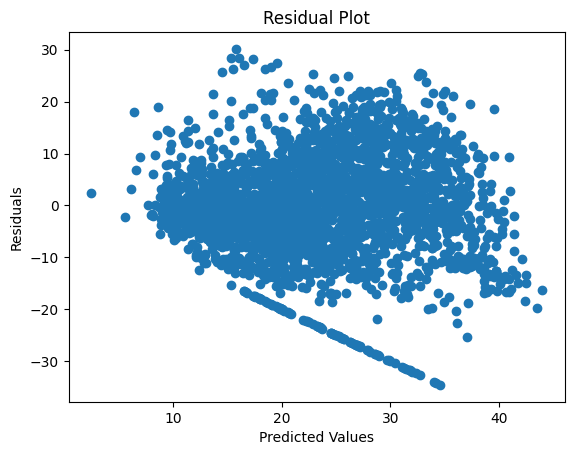

In [71]:
#Heteroscadacity - Residual Plot
plt.scatter((y_pred_test_elasticnet),(y_test)-(y_pred_test_elasticnet))
plt.xlabel("Predicted Values")
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

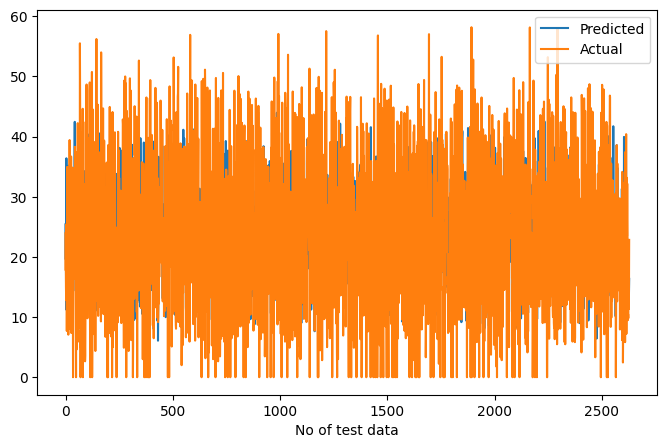

In [72]:
#Actual vs Prediction for Elasticnet Regression Plot
plt.figure(figsize=(8,5))
plt.plot(y_pred_test_elasticnet)
plt.plot(np.array(y_test))
plt.legend(['Predicted','Actual'])
plt.xlabel('No of test data')
plt.show()

### ML Model - 5 (Decision Tree)

In [73]:
# ML Model - 5 Implementation
decision_tree = DecisionTreeRegressor(criterion='friedman_mse',max_depth=8, max_features=9, max_leaf_nodes=100)

# Fit the Algorithm
decision_tree.fit(x_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=8, max_features=9,
                      max_leaf_nodes=100)

In [74]:
#Get the X_train and X_test value
y_pred_train_dt = decision_tree.predict(x_train)
y_pred_test_dt = decision_tree.predict(x_test)

In [75]:
print(y_pred_train_dt)
print(y_pred_test_dt)

[34.19688827 34.19688827 32.94894866 ... 34.19688827 19.1652182
 19.1652182 ]
[26.11008785 28.30545648 20.67899011 ...  7.37478828 14.05978097
 26.18928269]


In [76]:
#Calculate Model Score
Model_Score = decision_tree.score(x_train,y_train)
print('Model Score :',Model_Score)

Model Score : 0.6962569140538235


In [77]:
#Calculate MSE
MSE = mean_squared_error(y_train,y_pred_train_dt)
print('MSE :',MSE)

#Calculate RMSE
RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

#Calculate MAE
MAE = mean_absolute_error(y_train,y_pred_train_dt)
print('MAE :',MAE)

#Calculate r2_score
R2 = r2_score(y_train,y_pred_train_dt)
print('r2_score :',R2)

#Calculate Adjusted r2_score
adjusted_r2_score = (1-(1-r2_score(y_train,y_pred_train_dt))*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('Adjusted R2 :',adjusted_r2_score)

MSE : 47.24799886680569
RMSE : 6.873717979871278
MAE : 5.115613768525918
r2_score : 0.6962569140538235
Adjusted R2 : 0.6907236097749591


In [78]:
#Storing the metric values in a dataframe
dict1 = {'Model' : 'Decision Tree',
         'MSE' : round(MSE,3),
         'RMSE' : round(RMSE,3),
         'MAE' : round(MAE,3),
         'r2_Score' : round(R2,3),
         'Adjusted R2' : round(adjusted_r2_score,3)
}
training_df = training_df.append(dict1,ignore_index=True)

<ipython-input-78-a986461f9fd1>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  training_df = training_df.append(dict1,ignore_index=True)


In [79]:
#Calculate MSE
MSE = mean_squared_error(y_test,y_pred_test_dt)
print('MSE :',MSE)

#Calculate RMSE
RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

#Calculate MAE
MAE = mean_absolute_error(y_test,y_pred_test_dt)
print('MAE :',MAE)

#Calculate r2_score
R2 = r2_score(y_test,y_pred_test_dt)
print('r2_score :',R2)

#Calculate Adjusted r2_score
adjusted_r2_score = (1-(1-r2_score(y_test,y_pred_test_dt))*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('Adjusted R2 :',adjusted_r2_score)

MSE : 55.65216550696738
RMSE : 7.4600379025154675
MAE : 5.483433816613559
r2_score : 0.6376766988421874
Adjusted R2 : 0.6310762356040411


In [80]:
#Storing the metric values in a dataframe
dict2 = {'Model' : 'Decision Tree',
         'MSE' : round(MSE,3),
         'RMSE' : round(RMSE,3),
         'MAE' : round(MAE,3),
         'r2_Score' : round(R2,3),
         'Adjusted R2' : round(adjusted_r2_score,3)
}
test_df = test_df.append(dict2,ignore_index=True)

<ipython-input-80-58f746dcd820>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(dict2,ignore_index=True)


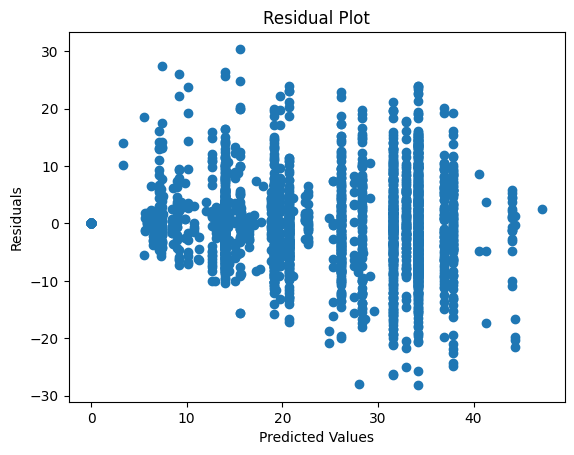

In [81]:
#Heteroscadacity - Residual Plot
plt.scatter((y_pred_test_dt),(y_test)-(y_pred_test_dt))
plt.xlabel("Predicted Values")
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

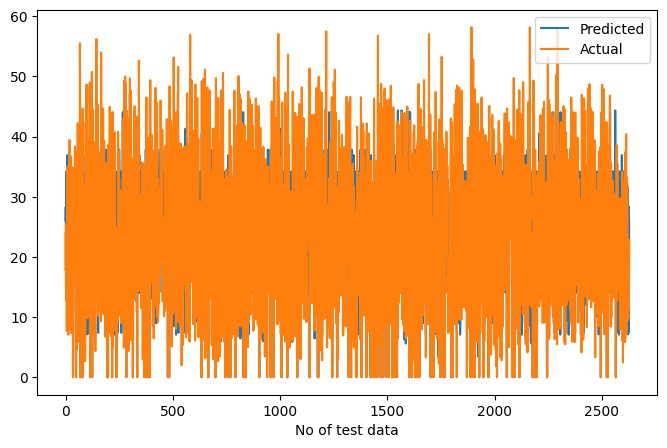

In [82]:
#Actual vs Prediction for Decision Tree Plot
plt.figure(figsize=(8,5))
plt.plot(y_pred_test_dt)
plt.plot(np.array(y_test))
plt.legend(['Predicted','Actual'])
plt.xlabel('No of test data')
plt.show()

### ML Model - 6 (Random Forest)

In [83]:
# ML Model - 6 Implementation
random_forest = RandomForestRegressor()

# Fit the Algorithm
random_forest.fit(x_train,y_train)

RandomForestRegressor()

In [84]:
#Calculate Model Score
Model_Score = random_forest.score(x_train,y_train)
print('Model Score :',Model_Score)

Model Score : 0.9894571741969806


In [85]:
#Get the X_train and X_test value
y_pred_train_rf = random_forest.predict(x_train)
y_pred_test_rf = random_forest.predict(x_test)

In [86]:
#Calculate MSE
MSE = mean_squared_error(y_train,y_pred_train_rf)
print('MSE :',MSE)

#Calculate RMSE
RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

#Calculate MAE
MAE = mean_absolute_error(y_train,y_pred_train_rf)
print('MAE :',MAE)

#Calculate r2_score
R2 = r2_score(y_train,y_pred_train_rf)
print('r2_score :',R2)

#Calculate Adjusted r2_score
adjusted_r2_score = (1-(1-r2_score(y_train,y_pred_train_rf))*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('Adjusted R2 :',adjusted_r2_score)

MSE : 1.6399629971569365
RMSE : 1.2806104002220724
MAE : 0.8119136160381799
r2_score : 0.9894571741969806
Adjusted R2 : 0.9892651149672357


In [87]:
#Storing the metric values in a dataframe
dict1 = {'Model' : 'Random Forest',
         'MSE' : round(MSE,3),
         'RMSE' : round(RMSE,3),
         'MAE' : round(MAE,3),
         'r2_Score' : round(R2,3),
         'Adjusted R2' : round(adjusted_r2_score,3)
}
training_df = training_df.append(dict1,ignore_index=True)

<ipython-input-87-bd0c8e01a399>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  training_df = training_df.append(dict1,ignore_index=True)


In [88]:
#Calculate MSE
MSE = mean_squared_error(y_test,y_pred_test_rf)
print('MSE :',MSE)

#Calculate RMSE
RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

#Calculate MAE
MAE = mean_absolute_error(y_test,y_pred_test_rf)
print('MAE :',MAE)

#Calculate r2_score
R2 = r2_score(y_test,y_pred_test_rf)
print('r2_score :',R2)

#Calculate Adjusted r2_score
adjusted_r2_score = (1-(1-r2_score(y_test,y_pred_test_rf))*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('Adjusted R2 :',adjusted_r2_score)

MSE : 12.70884632107773
RMSE : 3.5649468889560936
MAE : 2.2514669536770784
r2_score : 0.9172590839725057
Adjusted R2 : 0.9157517882154157


In [89]:
#Storing the metric values in a dataframe
dict2 = {'Model' : 'Random Forest',
         'MSE' : round(MSE,3),
         'RMSE' : round(RMSE,3),
         'MAE' : round(MAE,3),
         'r2_Score' : round(R2,3),
         'Adjusted R2' : round(adjusted_r2_score,3)
}
test_df = test_df.append(dict2,ignore_index=True)

<ipython-input-89-f755909b0a74>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(dict2,ignore_index=True)


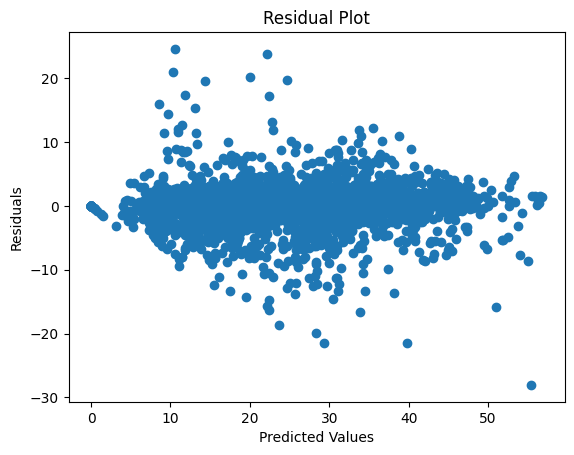

In [90]:
#Heteroscadacity - Residual Plot
plt.scatter((y_pred_test_rf),(y_test)-(y_pred_test_rf))
plt.xlabel("Predicted Values")
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

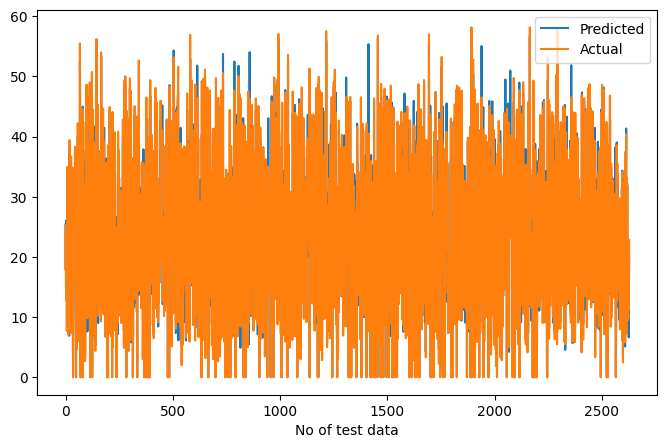

In [91]:
#Actual vs Prediction for Decision Tree Plot
plt.figure(figsize=(8,5))
plt.plot(y_pred_test_rf)
plt.plot(np.array(y_test))
plt.legend(['Predicted','Actual'])
plt.xlabel('No of test data')
plt.show()

### ML Model - 7 (Gradient Boost)

In [92]:
# ML Model - 7 Implementation
gradient_boost = GradientBoostingRegressor()

# Fit the Algorithm
gradient_boost.fit(x_train,y_train)

#Calculate Model Score
Model_Score = gradient_boost.score(x_train,y_train)
print('Model Score :',Model_Score)

Model Score : 0.8774111272624191


In [93]:
#Get the X_train and X_test value
y_pred_train_gb = gradient_boost.predict(x_train)
y_pred_test_gb = gradient_boost.predict(x_test)

In [94]:
#Calculate MSE
MSE = mean_squared_error(y_train,y_pred_train_gb)
print('MSE :',MSE)

#Calculate RMSE
RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

#Calculate MAE
MAE = mean_absolute_error(y_train,y_pred_train_gb)
print('MAE :',MAE)

#Calculate r2_score
R2 = r2_score(y_train,y_pred_train_gb)
print('r2_score :',R2)

#Calculate Adjusted r2_score
adjusted_r2_score = (1-(1-r2_score(y_train,y_pred_train_gb))*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('Adjusted R2 :',adjusted_r2_score)

MSE : 19.06900663152732
RMSE : 4.366807372844298
MAE : 3.3048793084532897
r2_score : 0.8774111272624191
Adjusted R2 : 0.8751779191156492


In [95]:
#Storing the metric values in a dataframe
dict1 = {'Model' : 'Gradient Boost',
         'MSE' : round(MSE,3),
         'RMSE' : round(RMSE,3),
         'MAE' : round(MAE,3),
         'r2_Score' : round(R2,3),
         'Adjusted R2' : round(adjusted_r2_score,3)
}
training_df = training_df.append(dict1,ignore_index=True)

<ipython-input-95-5ecb9638e3fe>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  training_df = training_df.append(dict1,ignore_index=True)


In [96]:
#Calculate MSE
MSE = mean_squared_error(y_test,y_pred_test_gb)
print('MSE :',MSE)

#Calculate RMSE
RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

#Calculate MAE
MAE = mean_absolute_error(y_test,y_pred_test_gb)
print('MAE :',MAE)

#Calculate r2_score
R2 = r2_score(y_test,y_pred_test_gb)
print('r2_score :',R2)

#Calculate Adjusted r2_score
adjusted_r2_score = (1-(1-r2_score(y_test,y_pred_test_gb))*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('Adjusted R2 :',adjusted_r2_score)

MSE : 21.24752011489474
RMSE : 4.609503239492813
MAE : 3.4993834546059057
r2_score : 0.8616680670138186
Adjusted R2 : 0.8591480666842254


In [97]:
#Storing the metric values in a dataframe
dict2 = {'Model' : 'Gradient Boost',
         'MSE' : round(MSE,3),
         'RMSE' : round(RMSE,3),
         'MAE' : round(MAE,3),
         'r2_Score' : round(R2,3),
         'Adjusted R2' : round(adjusted_r2_score,3)
}
test_df = test_df.append(dict2,ignore_index=True)

<ipython-input-97-9182a15355d7>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(dict2,ignore_index=True)


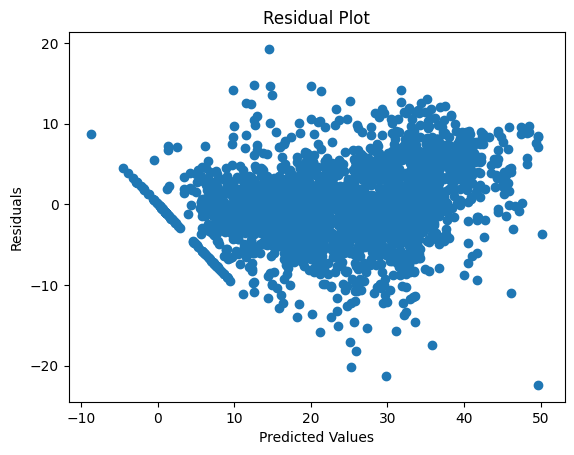

In [98]:
#Heteroscadacity - Residual Plot
plt.scatter((y_pred_test_gb),(y_test)-(y_pred_test_gb))
plt.xlabel("Predicted Values")
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

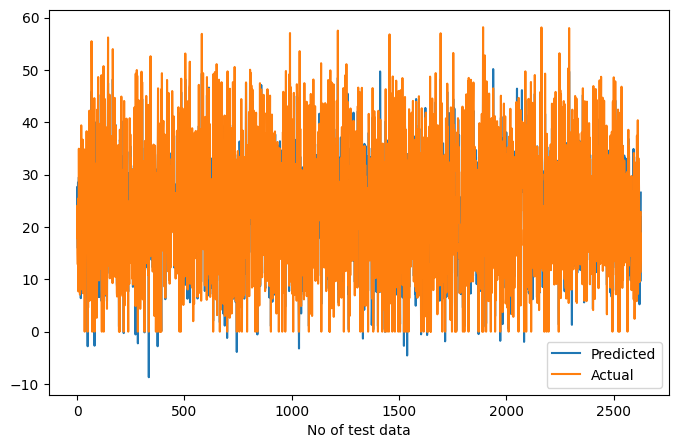

In [99]:
#Actual vs Prediction for Gradient Boost Plot
plt.figure(figsize=(8,5))
plt.plot(y_pred_test_gb)
plt.plot(np.array(y_test))
plt.legend(['Predicted','Actual'])
plt.xlabel('No of test data')
plt.show()

### ML Model - 8 (Gradient Boosting with Cross Validation)

In [100]:
# ML Model - 8
# Assigning the number of trees and depth of trees
n_estimators = [50,75,100]
max_depth = [4,6,8]

# Minimum no.of samples required to split a node
min_sample_split = [50,100,150]

# Minimum no.of samples required at each leaf node
min_sample_leaf = [40,50]

#Hyperparameter Grid
parameter_dict = { 'n_estimators' : n_estimators,
                  'max_depth' : max_depth,
                   'min_sample_split' : min_sample_split,
                   'min_sample_leaf' : min_sample_leaf

}


In [101]:
parameter_dict

{'n_estimators': [50, 75, 100],
 'max_depth': [4, 6, 8],
 'min_sample_split': [50, 100, 150],
 'min_sample_leaf': [40, 50]}

In [102]:
# ML Model - 8 Implementation
#Create a instance of the GradientBoostingRegressor
gb_boost = GradientBoostingRegressor()

#Grid Search
parameter_dict = {'learning_rate':[0.1,0.01],
                  'n_estimators':[50,100],
                  'max_depth':[3,5]}

gb_grid = GridSearchCV(estimator=gb_boost,
                       param_grid=parameter_dict,
                       cv=3,verbose=2,n_jobs=-1)

gb_grid.fit(x_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01], 'max_depth': [3, 5],
                         'n_estimators': [50, 100]},
             verbose=2)

In [103]:
gb_optimal_model = gb_grid.best_estimator_

In [104]:
gb_grid.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

In [105]:
#Get the X_train and X_test value
y_pred_train_gboost = gb_optimal_model.predict(x_train)
y_pred_test_gboost = gb_optimal_model.predict(x_test)

In [106]:
#Calculate MSE
MSE = mean_squared_error(y_train,y_pred_train_gboost)
print('MSE :',MSE)

#Calculate RMSE
RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

#Calculate MAE
MAE = mean_absolute_error(y_train,y_pred_train_gboost)
print('MAE :',MAE)

#Calculate r2_score
R2 = r2_score(y_train,y_pred_train_gboost)
print('r2_score :',R2)

#Calculate Adjusted r2_score
adjusted_r2_score = (1-(1-r2_score(y_train,y_pred_train_gboost))*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('Adjusted R2 :',adjusted_r2_score)

MSE : 8.833981666050574
RMSE : 2.9722014847669014
MAE : 2.1445440164558787
r2_score : 0.9432090053167673
Adjusted R2 : 0.942174440684941


In [107]:
#Storing the metric values in a dataframe
dict1 = {'Model' : 'Gradient Boost with Cross Validation',
         'MSE' : round(MSE,3),
         'RMSE' : round(RMSE,3),
         'MAE' : round(MAE,3),
         'r2_Score' : round(R2,3),
         'Adjusted R2' : round(adjusted_r2_score,3)
}
training_df = training_df.append(dict1,ignore_index=True)

<ipython-input-107-d37b0da29719>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  training_df = training_df.append(dict1,ignore_index=True)


In [108]:
#Calculate MSE
MSE = mean_squared_error(y_test,y_pred_test_gboost)
print('MSE :',MSE)

#Calculate RMSE
RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

#Calculate MAE
MAE = mean_absolute_error(y_test,y_pred_test_gboost)
print('MAE :',MAE)

#Calculate r2_score
R2 = r2_score(y_test,y_pred_test_gboost)
print('r2_score :',R2)

#Calculate Adjusted r2_score
adjusted_r2_score = (1-(1-r2_score(y_test,y_pred_test_gboost))*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('Adjusted R2 :',adjusted_r2_score)

MSE : 13.511495618458776
RMSE : 3.675798636821497
MAE : 2.608338711231735
r2_score : 0.9120334374868772
Adjusted R2 : 0.9104309458441963


In [109]:
#Storing the metric values in a dataframe
dict2 = {'Model' : 'Gradient Boost with Cross Validation',
         'MSE' : round(MSE,3),
         'RMSE' : round(RMSE,3),
         'MAE' : round(MAE,3),
         'r2_Score' : round(R2,3),
         'Adjusted R2' : round(adjusted_r2_score,3)
}
test_df = test_df.append(dict2,ignore_index=True)

<ipython-input-109-8c953e0a7088>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append(dict2,ignore_index=True)


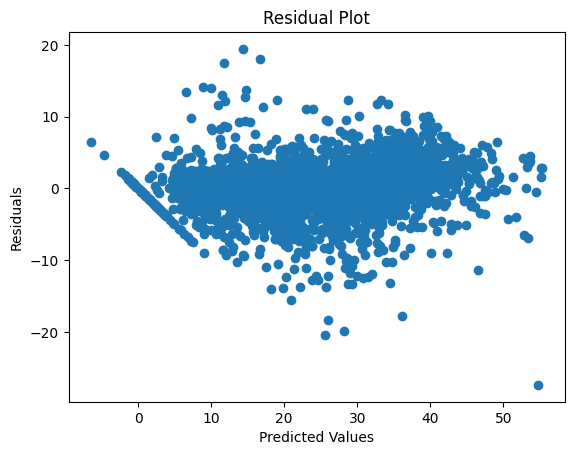

In [110]:
#Heteroscadacity - Residual Plot
plt.scatter((y_pred_test_gboost),(y_test)-(y_pred_test_gboost))
plt.xlabel("Predicted Values")
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

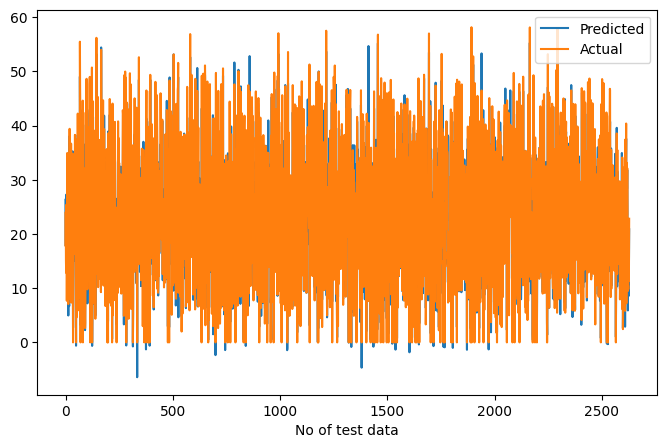

In [111]:
#Actual vs Prediction for Gradient Boost Plot
plt.figure(figsize=(8,5))
plt.plot(y_pred_test_gboost)
plt.plot(np.array(y_test))
plt.legend(['Predicted','Actual'])
plt.xlabel('No of test data')
plt.show()


## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

In [112]:
#Viewing the entire evaluation metrics of all models
conclusion = pd.concat([training_df,test_df],keys=['Training set','Test set'])
conclusion

Model     MSE   RMSE    MAE  \
Training set 0                     Linear Regression  35.224  5.935  4.480   
             1                      Lasso Regression  92.602  9.623  7.286   
             2                      Ridge Regression  35.226  5.935  4.481   
             3                 Elasticnet Regression  91.360  9.558  7.251   
             4                         Decision Tree  47.248  6.874  5.116   
             5                         Random Forest   1.640  1.281  0.812   
             6                        Gradient Boost  19.069  4.367  3.305   
             7  Gradient Boost with Cross Validation   8.834  2.972  2.145   
Test set     0                     Linear Regression  33.348  5.775  4.428   
             1                      Lasso Regression  93.344  9.661  7.336   
             2                      Ridge Regression  33.366  5.776  4.431   
             3                 Elasticnet Regression  92.046  9.594  7.300   
             4                         Decision Tree  55.652  7.460  5.483   
             5                         Random Forest  12.709  3.565  2.251   
             6                        Gradient Boost  21.248  4.610  3.499   
             7  Gradient Boost with Cross Validation  13.511  3.676  2.608   

                r2_Score  Adjusted R2  
Training set 0     0.774        0.769  
             1     0.405        0.394  
             2     0.774        0.769  
             3     0.413        0.402  
             4     0.696        0.691  
             5     0.989        0.989  
             6     0.877        0.875  
             7     0.943        0.942  
Test set     0     0.783        0.779  
             1     0.392        0.381  
             2     0.783        0.779  
             3     0.401        0.390  
             4     0.638        0.631  
             5     0.917        0.916  
             6     0.862        0.859  
             7     0.912        0.910

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***